## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Exploratory data analysis

In [4]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#observe the different feature type present in the data
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Here we will observe the distribution of our classes

In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

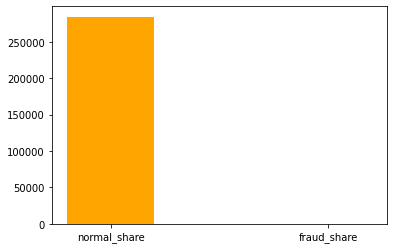

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

plt.bar(["normal_share","fraud_share"], [classes[0],classes[1]], color ='orange',
        width = 0.4)
plt.show()


Text(0.5, 1.05, 'Time vs Class Distribution')

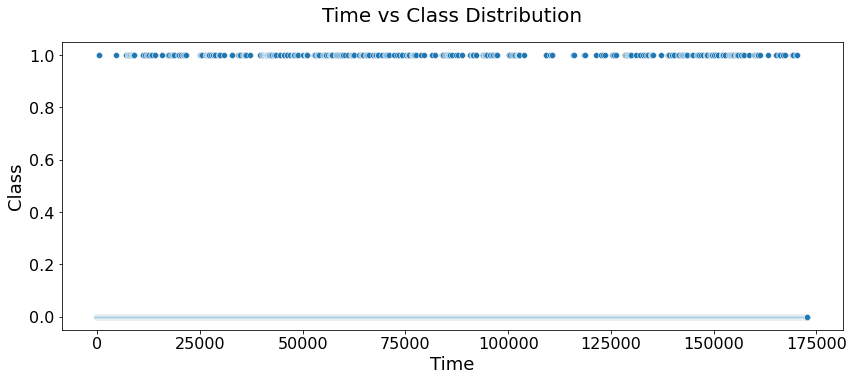

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set2')

plt.subplot(3,1,1)
sns.scatterplot(x=df['Time'], y='Class', palette=cmap, data=df)
plt.xlabel('Time', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Time vs Class Distribution', size=20, y=1.05)

Text(0.5, 1.05, 'Amount vs Class Distribution')

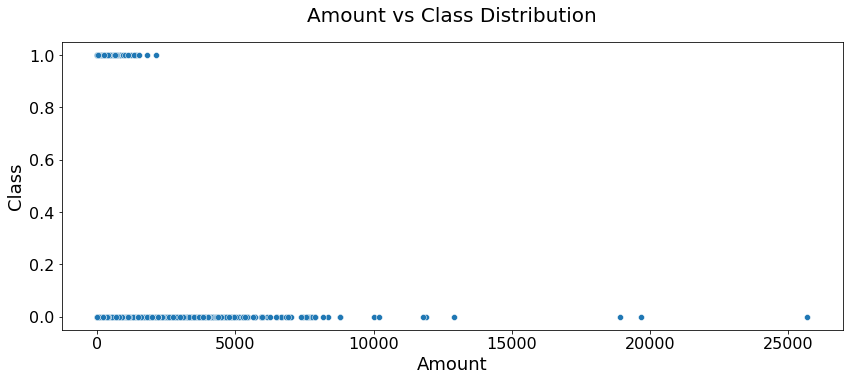

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount

fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set2')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df['Amount'], y='Class', palette=cmap, data=df)
plt.xlabel('Amount', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Amount vs Class Distribution', size=20, y=1.05)

In [5]:
# Drop unnecessary columns
df.drop('Time', axis = 1, inplace= True)

### Splitting the data into train & test data

In [6]:
y= y= df['Class']
X = df.drop(['Class'], axis=1)
#class variable

In [7]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [8]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


### Plotting the distribution of a variable

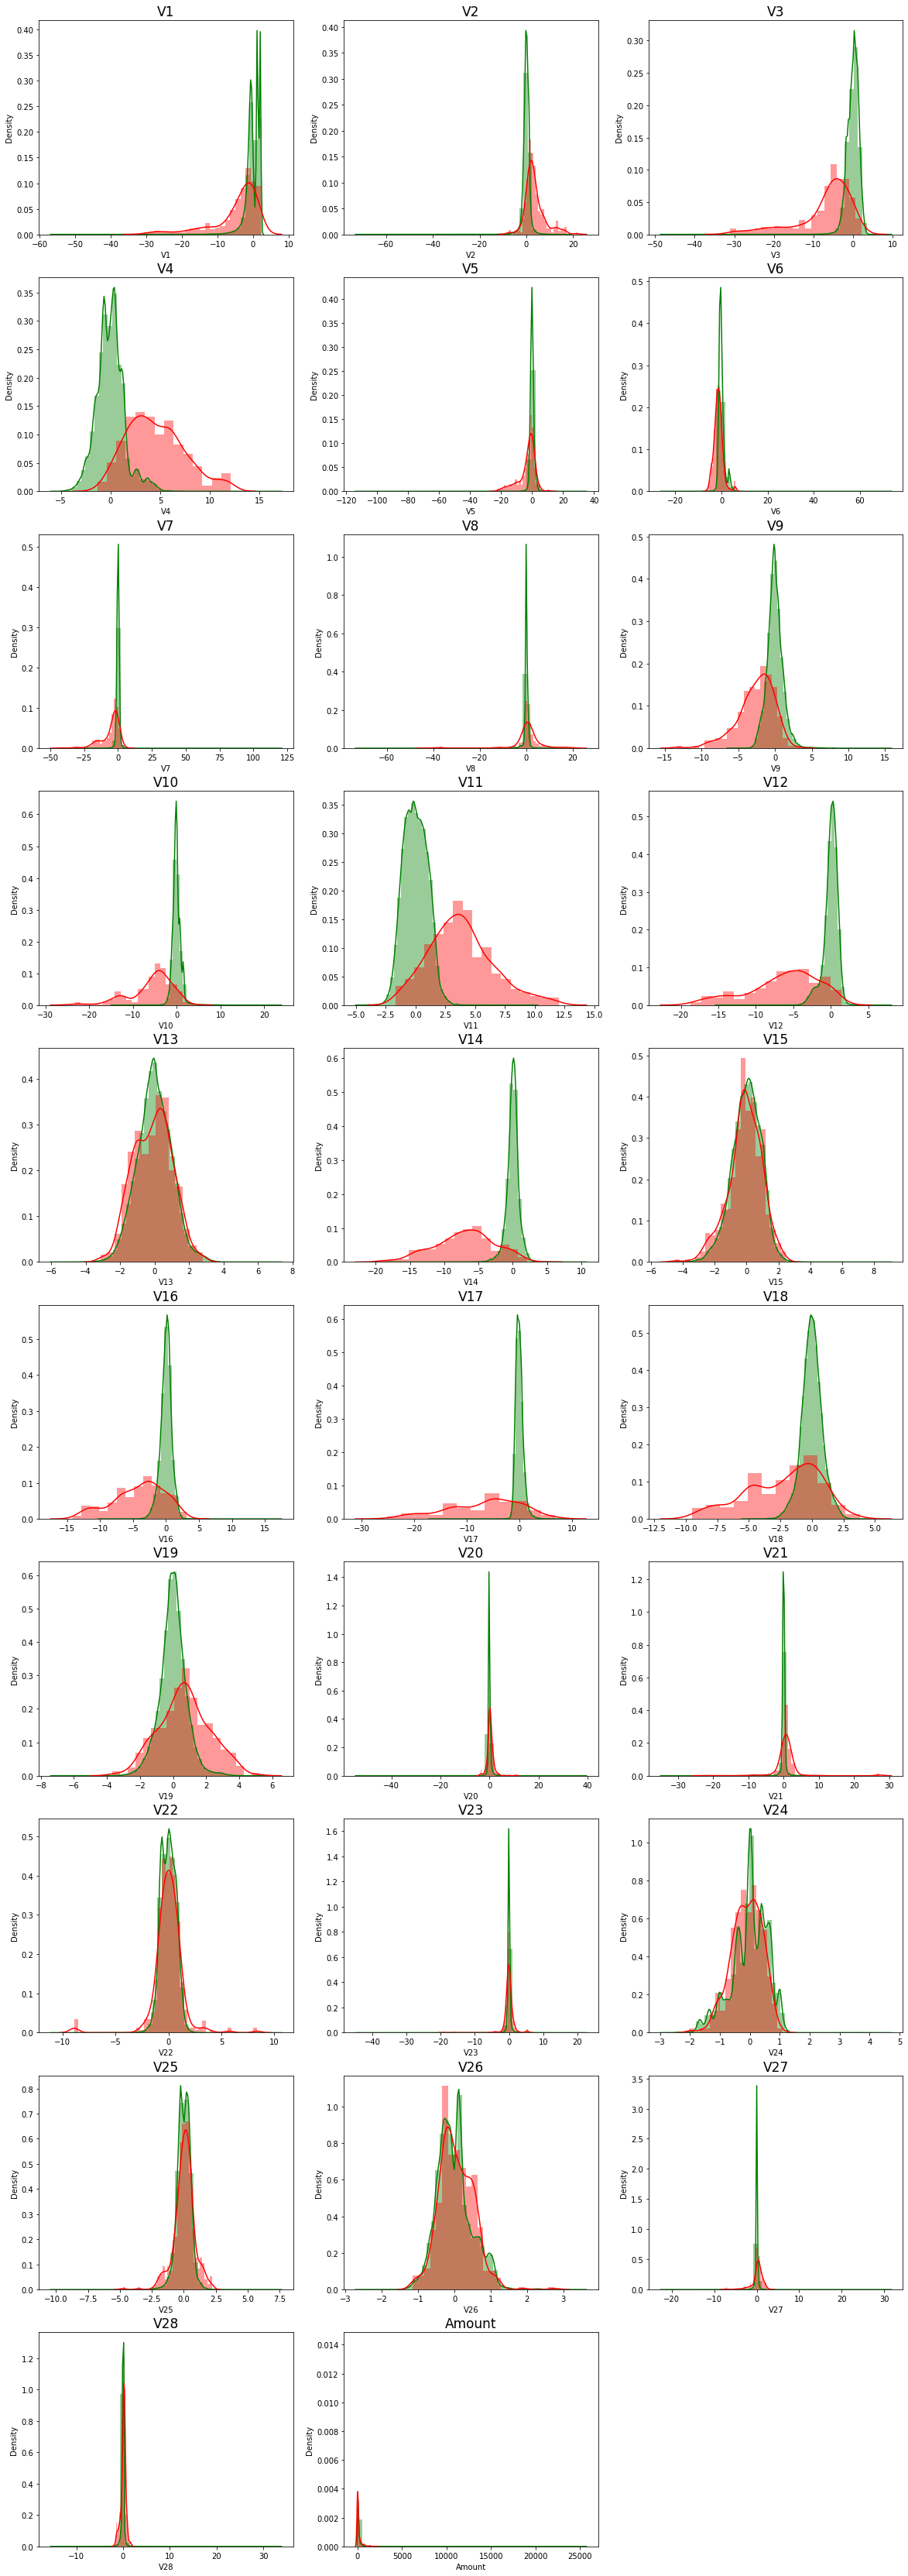

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
import warnings
warnings.filterwarnings("ignore")
cols = list(X.columns.values)
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(X[col][normal_records], color='green')
    sns.distplot(X[col][fraud_records], color='red')
    plt.title(col, fontsize=17)
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [ ]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       
X_train_pt = pt.transform(X_train)    
X_test_pt = pt.transform(X_test)

Variable from the train dataset


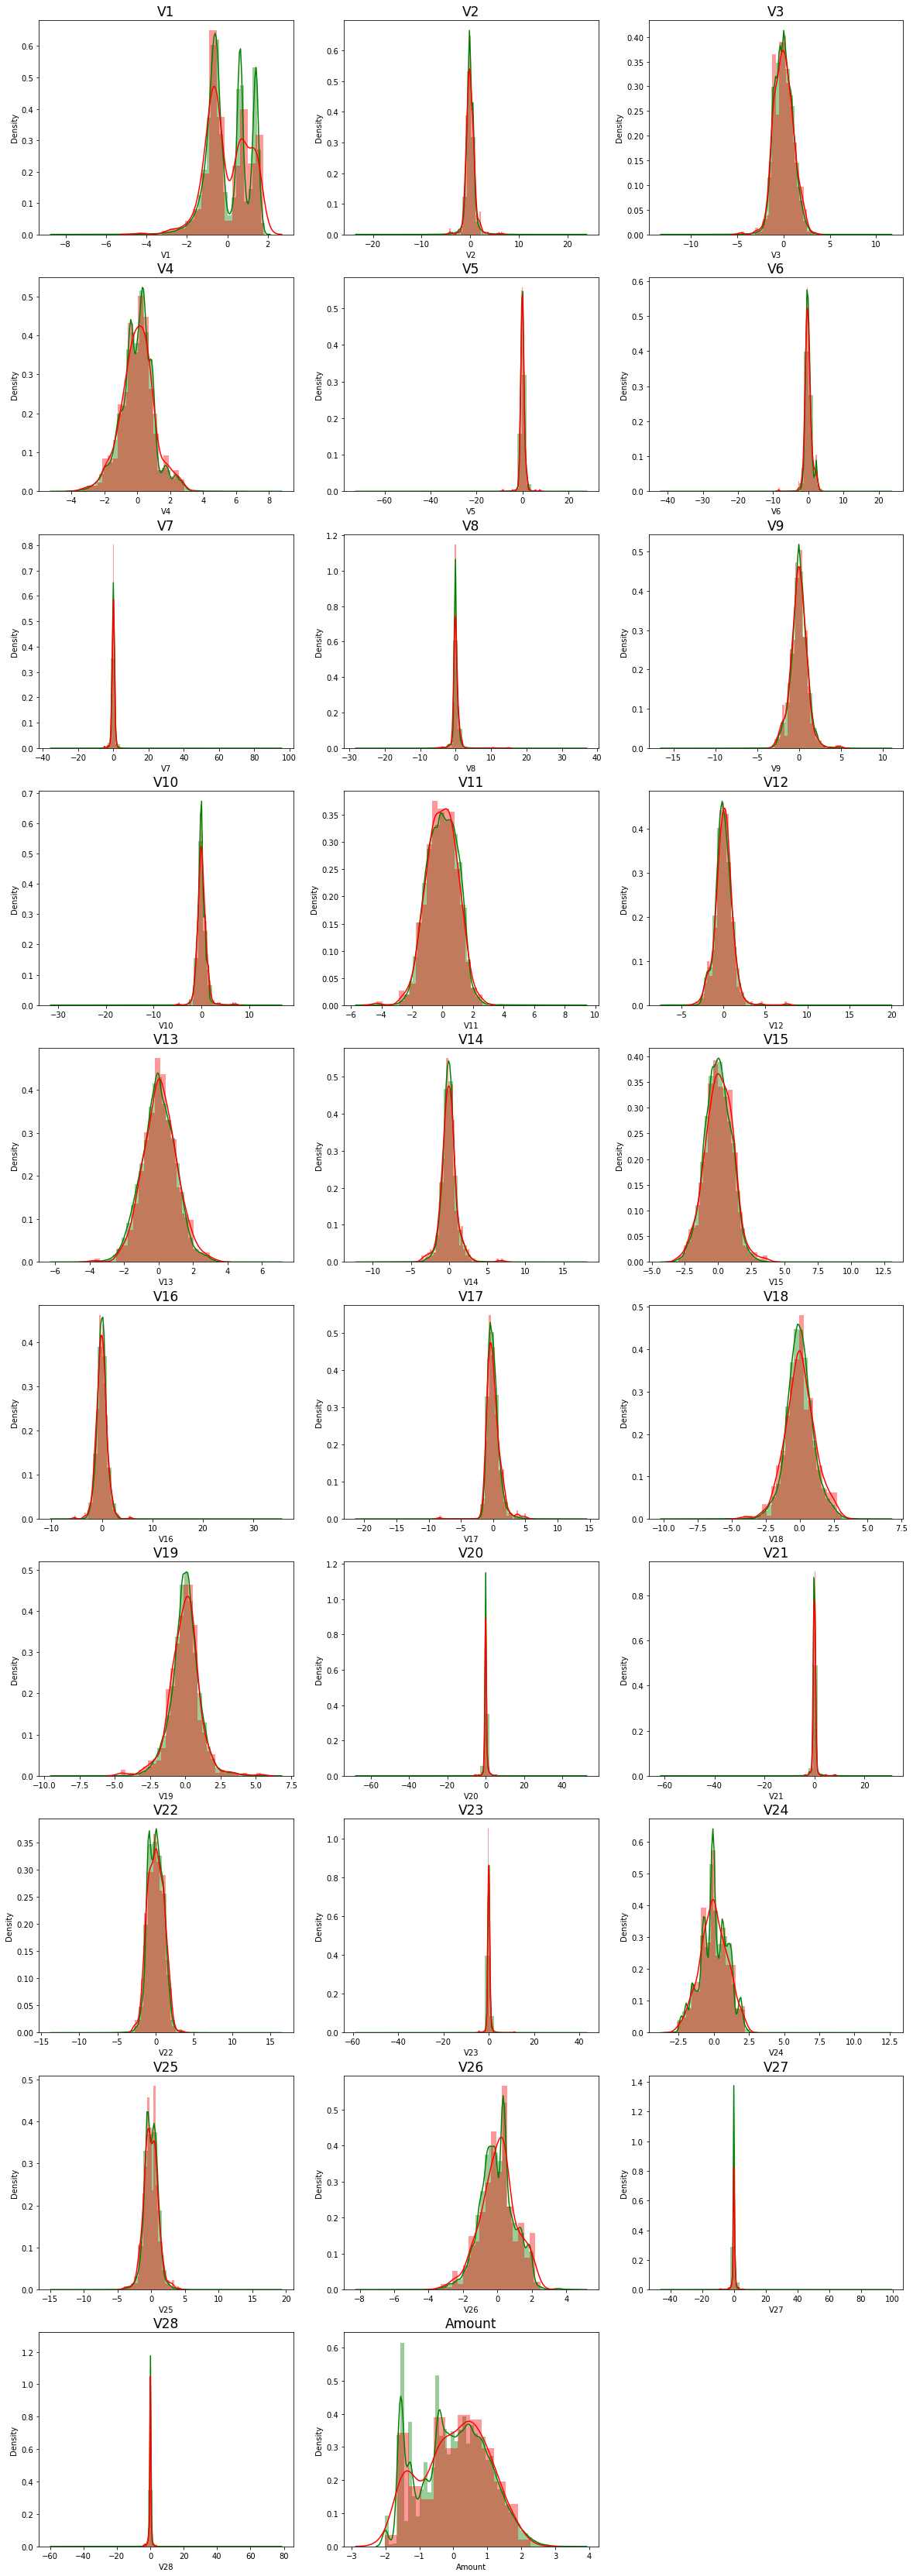







**********************************************************************************************






Variable from the test dataset


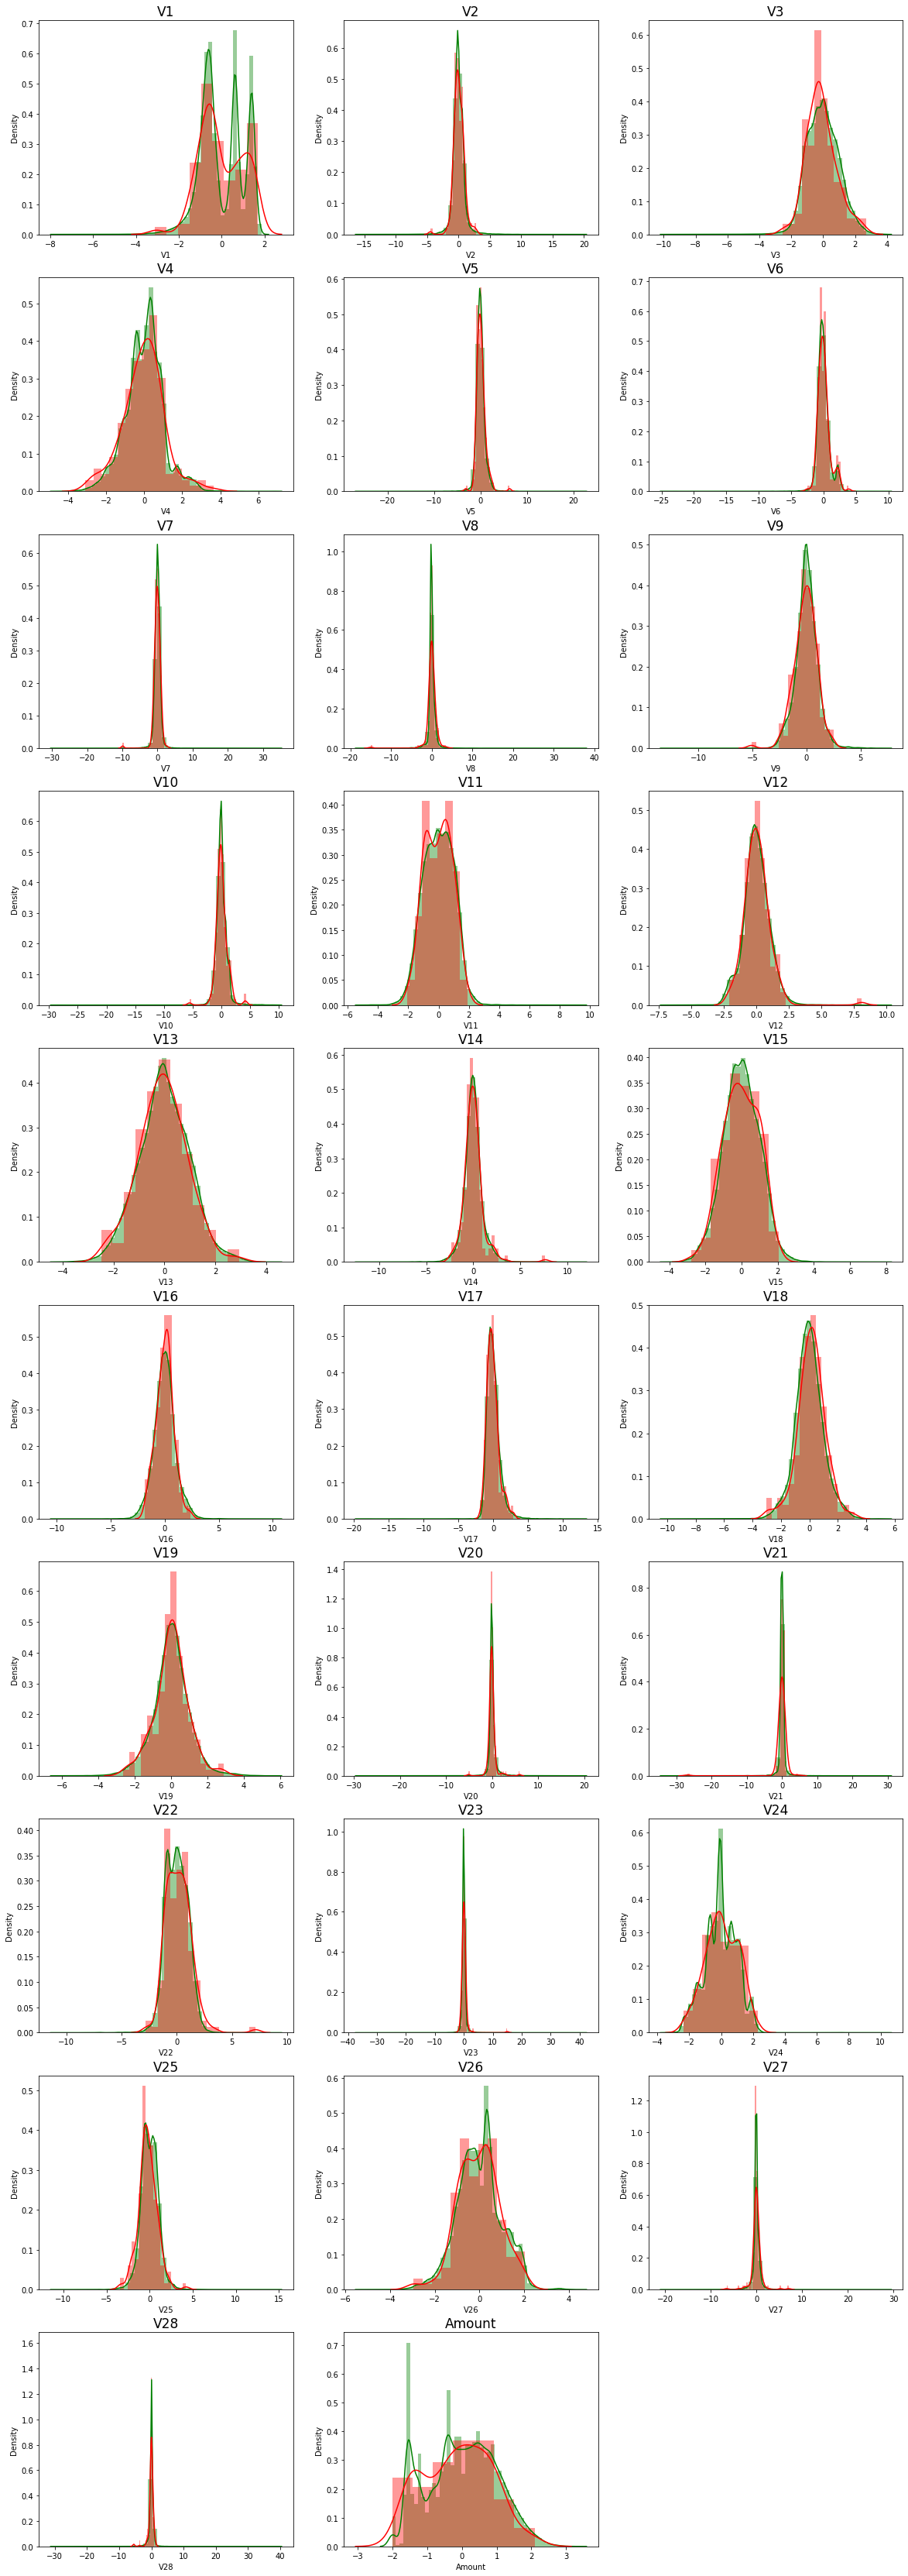

In [ ]:
# plot the histogram of a variable from the dataset again to see the result 
X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=cols)
plt.figure(figsize=(20, 60))

print("Variable from the train dataset")
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(X_train_pt_df[col][normal_records], color='green')
    sns.distplot(X_train_pt_df[col][fraud_records], color='red')
    plt.title(col, fontsize=17)
plt.show()  
print("\n") 
print("\n")
print("\n")
print("**********************************************************************************************")
print("\n")
print("\n")
print("\n")
print("Variable from the test dataset")

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(X_test_pt_df[col][normal_records], color='green')
    sns.distplot(X_test_pt_df[col][fraud_records], color='red')
    plt.title(col, fontsize=17)
plt.show()  

## Model Building
- Build different models on the imbalanced dataset and see the result

In [ ]:
# We are creating a dataframe to store our results
Data_Results = pd.DataFrame(columns=['Data_Imbalance_Handiling','Model','Accuracy','roc_value','threshold'])

In [ ]:
# Defining Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Defining function to plot confusion matrix
def plot_confusion_matrix(y_test, pred):
    
    y_test_legit = y_test.value_counts()[0]
    y_test_fraud = y_test.value_counts()[1]
    
    cfn_matrix = confusion_matrix(y_test, pred)
    cfn_norm_matrix = np.array([[1.0 / y_test_legit,1.0/y_test_legit],[1.0/y_test_fraud,1.0/y_test_fraud]])
    norm_cfn_matrix = cfn_matrix * cfn_norm_matrix

    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(1,2,1)
    sns.heatmap(cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)
    plt.title('Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')

    ax = fig.add_subplot(1,2,2)
    sns.heatmap(norm_cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)

    plt.title('Normalized Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')
    plt.show()
    
    print('---Classification Report---')
    print(classification_report(y_test,pred))

# Logistic Regression Model

In [ ]:
# Logistic Regression
def build_Run_Logistic_model(Data_Results, Data_imbaalance, X_train,y_train, X_test, y_test ):
    
    from sklearn import linear_model # importing the sklearn logistic package
    from sklearn.model_selection import KFold
  
    numm_1 = list(np.power(10.0, np.arange(-10,10)))
    CV_num1 = KFold(n_splits=10, shuffle=True, random_state=42)
  
    search_CVL2 = linear_model.LogisticRegressionCV(
            Cs= numm_1
            ,penalty='l2'
            ,scoring='roc_auc'
            ,cv=CV_num1
            ,random_state=42
            ,max_iter=10000
            ,fit_intercept=True
            ,solver='newton-cg'
            ,tol=10
        )
  
    search_CVL1 = linear_model.LogisticRegressionCV(
            Cs=numm_1
            ,penalty='l1'
            ,scoring='roc_auc'
            ,cv=CV_num1
            ,random_state=42
            ,max_iter=10000
            ,fit_intercept=True
            ,solver='liblinear'
            ,tol=10
        )
    
    search_CVL2.fit(X_train, y_train)
    search_CVL1.fit(X_train, y_train)
    print ('Maxim AUC & ROC for l2:', search_CVL2.scores_[1].mean(axis=0).max())
    print ('Maxim AUC & ROC for l1:', search_CVL1.scores_[1].mean(axis=0).max())
  
    print("Params of l2 regularisaationss")
    print(search_CVL2.coef_)
    print(search_CVL2.intercept_) 
    print(search_CVL2.scores_) 
  
    print("Params of l regularisaationss")
    print(search_CVL1.coef_)
    print(search_CVL1.intercept_) 
    print(search_CVL1.scores_) 
  

 #finding values of prediction
    y_predic_l2 = search_CVL2.predict(X_test)
    y_predic_l1 = search_CVL1.predict(X_test)
  

 #finding possibilitiess of prediction
    y_predic_probss_l2 = search_CVL2.predict_proba(X_test)[:,1] 
    y_predic_probss_l1 = search_CVL1.predict_proba(X_test)[:,1] 

  # Accuaracies for l2 and l1 models
    Accuracies_l2 = metrics.accuracy_score(y_pred=y_predic_l2, y_true=y_test)
    Accuracies_l1 = metrics.accuracy_score(y_pred=y_predic_l1, y_true=y_test)

    print("Accuarcies for Logistic Regression Models l2 regularisaationss : {0}".format(Accuracies_l2))
    print("Confusionn_Matrices")
    plot_confusion_matrix(y_test, y_predic_l2)
    print("classification_Report")
    print(classification_report(y_test, y_predic_l2))
    print("Accuarcies for Logistic Regression Models l1 regularisaationss : {0}".format(Accuracies_l1))
    print("Confusionn_Matrices")
    plot_confusion_matrix(y_test, y_predic_l1)

    from sklearn.metrics import roc_auc_score
    l2_rocValue = roc_auc_score(y_test, y_predic_probss_l2)
    print("l2_rocValue: {0}" .format(l2_rocValue))
    fpr, tpr, threesholds = metrics.roc_curve(y_test, y_predic_probss_l2)
    thresholdss = threesholds[np.argmax(tpr-fpr)]
    print("l2_threshold: {0}".format(thresholdss))

    roc_auc1 = metrics.auc(fpr,tpr)
    print("ROC_test_Data",'{:.1%}'.format(roc_auc1))
    plt.plot(fpr,tpr,label="Test,auc="+str(roc_auc1))
    plt.legend(loc=4)
    plt.show()
  
    Data_Results = Data_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': Data_imbaalance,'Model': 'LR_L2_Regularisations','Accuracy': Accuracies_l2,'roc_value': l2_rocValue,'threshold': thresholdss}, index=[0]),ignore_index= True)

    l1_rocValues = roc_auc_score(y_test, y_predic_probss_l1)
    print("l1_rocValues: {0}" .format(l1_rocValues))
    fpr, tpr, threesholds = metrics.roc_curve(y_test, y_predic_probss_l1)
    thresholdss = threesholds[np.argmax(tpr-fpr)]
    print("l1_threshold: {0}".format(thresholdss))

    roc_and_auc = metrics.auc(fpr, tpr)
    print("ROC_test_dataset",'{:.1%}'.format(roc_and_auc))
    plt.plot(fpr,tpr,label="Test,auc="+str(roc_and_auc))
    plt.legend(loc=4)
    plt.show()
  
    Data_Results = Data_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': Data_imbaalance,'Model': 'LR_L1_Regularisations','Accuracy': Accuracies_l1,'roc_value': l1_rocValues,'threshold': thresholdss}, index=[0]),ignore_index= True)
    return Data_Results

Logistic Regression
Maxim AUC & ROC for l2: 0.9835809723709812
Maxim AUC & ROC for l1: 0.9853219439271429
Params of l2 regularisaationss
[[-0.09181889 -0.0712374  -0.28531014  0.55091475  0.02781282  0.01048326
  -0.06526899 -0.20404618 -0.19129152 -0.20367634  0.1699086  -0.4842302
  -0.12688193 -0.67607523 -0.07608236 -0.17854077 -0.08488114  0.03807597
  -0.03595016 -0.02173413  0.10387455  0.09976224 -0.03232496 -0.02864527
   0.01085616  0.0077547  -0.04525285 -0.02264856  0.0207067 ]]
[-8.0670714]
{1: array([[0.90480168, 0.90467957, 0.90467957, 0.90467957, 0.90467957,
        0.90507886, 0.96766036, 0.9925943 , 0.99533679, 0.99629898,
        0.99629898, 0.99629898, 0.99629898, 0.99629898, 0.99629898,
        0.99629898, 0.99629898, 0.99629898, 0.99629898, 0.99629898],
       [0.93560593, 0.93560205, 0.93560205, 0.93560205, 0.93560335,
        0.9359511 , 0.96663754, 0.98015472, 0.97723953, 0.97641733,
        0.97641733, 0.97641733, 0.97641733, 0.97641733, 0.97641733,
        0.

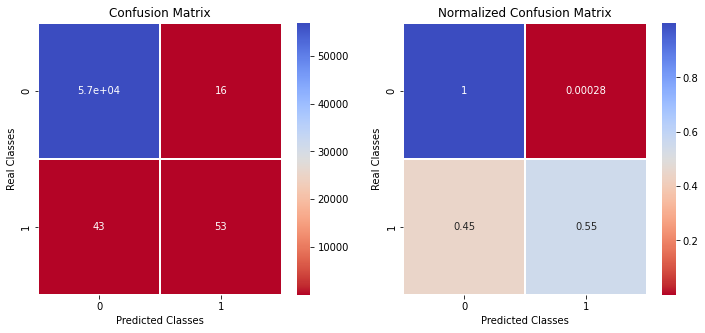

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.55      0.64        96

    accuracy                           1.00     56962
   macro avg       0.88      0.78      0.82     56962
weighted avg       1.00      1.00      1.00     56962

classification_Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.55      0.64        96

    accuracy                           1.00     56962
   macro avg       0.88      0.78      0.82     56962
weighted avg       1.00      1.00      1.00     56962

Accuarcies for Logistic Regression Models l1 regularisaationss : 0.9988413328183702
Confusionn_Matrices


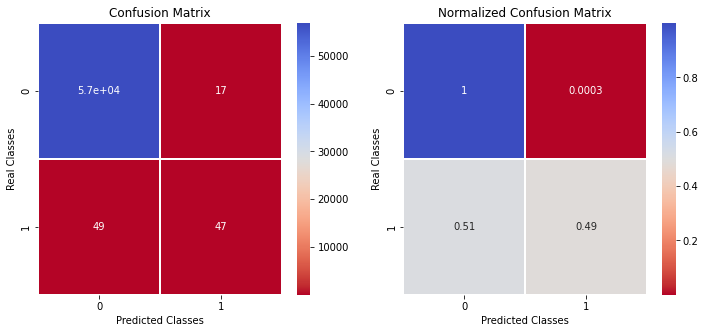

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.73      0.49      0.59        96

    accuracy                           1.00     56962
   macro avg       0.87      0.74      0.79     56962
weighted avg       1.00      1.00      1.00     56962

l2_rocValue: 0.9663073057714628
l2_threshold: 0.0010291757405334276
ROC_test_Data 96.6%


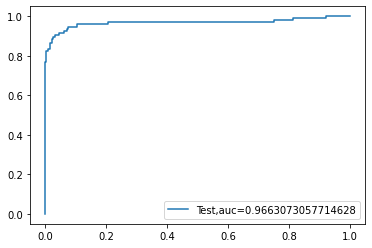

l1_rocValues: 0.9715465963844828
l1_threshold: 0.009045426426026536
ROC_test_dataset 97.2%


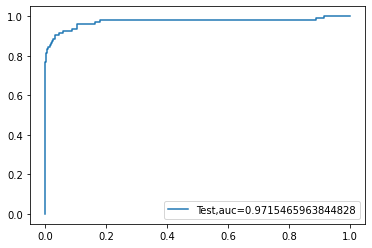

Time Taken by Model: --- 151.05669951438904 seconds ---
--------------------------------------------------------------------------------


In [ ]:
# Running and Checking Logistic Regression with L1 And L2 Regularisation
import time
print("Logistic Regression")
start_time = time.time()
Data_Results = build_Run_Logistic_model(Data_Results,"Power Transformer",X_train_pt,y_train, X_test_pt, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

## With repeated KFold

In [ ]:
# As per requirmnment Perfroming RepeatedKFold and checking the results

from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_CV, X_test_CV = X.iloc[train_index], X.iloc[test_index]
    y_train_CV, y_test_CV = y.iloc[train_index], y.iloc[test_index]

TRAIN: [     1      2      4 ... 284804 284805 284806] TEST: [     0      3     10 ... 284795 284798 284802]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     4     18     33 ... 284790 284791 284803]
TRAIN: [     0      1      3 ... 284803 284805 284806] TEST: [     2      6      8 ... 284794 284800 284804]
TRAIN: [     0      1      2 ... 284803 284804 284805] TEST: [     5     16     24 ... 284797 284799 284806]
TRAIN: [     0      2      3 ... 284803 284804 284806] TEST: [     1      7     13 ... 284793 284801 284805]
TRAIN: [     0      1      3 ... 284803 284805 284806] TEST: [     2     10     18 ... 284783 284787 284804]
TRAIN: [     0      1      2 ... 284803 284804 284805] TEST: [     5      8     17 ... 284794 284800 284806]
TRAIN: [     2      3      4 ... 284804 284805 284806] TEST: [     0      1     12 ... 284799 284801 284803]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     3      6      7 ... 284784 284798 284802]
TRAIN: [     0     

Logistic Regression
Maxim AUC & ROC for l2: 0.9837227625563421
Maxim AUC & ROC for l1: 0.9805747926970453
Params of l2 regularisaationss
[[ 1.51921307e-02  4.05948964e-02 -9.73718938e-02  2.32412869e-01
   9.08021098e-02 -5.13750827e-02 -3.54074208e-02 -1.10234930e-01
  -8.79605899e-02 -1.78431721e-01  1.34164195e-01 -2.02586005e-01
  -4.72287613e-02 -3.80964820e-01 -2.04510153e-03 -9.66296814e-02
  -8.12581434e-02 -5.17830445e-03  1.86515681e-03 -1.53569961e-02
   5.02099379e-02  2.02992099e-02 -1.37398246e-02 -1.77616012e-02
  -7.56363487e-03  2.95777501e-03  1.47307506e-03 -2.46481685e-04
   3.12972061e-04]]
[-7.41853365]
{1: array([[0.52271144, 0.52466555, 0.54846669, 0.70718828, 0.88976127,
        0.96381357, 0.98568036, 0.98642538, 0.97854881, 0.96843539,
        0.96843539, 0.96843539, 0.96843539, 0.96843539, 0.96843539,
        0.96843539, 0.96843539, 0.96843539, 0.96843539, 0.96843539],
       [0.68480773, 0.68689226, 0.70638394, 0.8358456 , 0.94529554,
        0.96351864, 0.

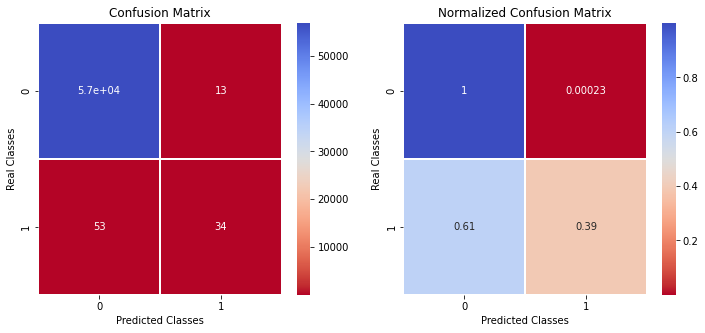

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.72      0.39      0.51        87

    accuracy                           1.00     56961
   macro avg       0.86      0.70      0.75     56961
weighted avg       1.00      1.00      1.00     56961

classification_Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.72      0.39      0.51        87

    accuracy                           1.00     56961
   macro avg       0.86      0.70      0.75     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcies for Logistic Regression Models l1 regularisaationss : 0.9988939800916417
Confusionn_Matrices


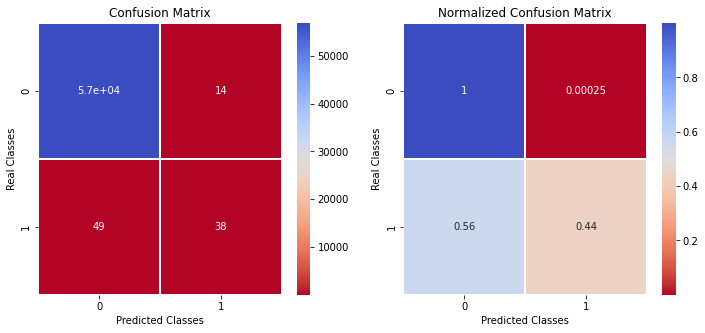

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.73      0.44      0.55        87

    accuracy                           1.00     56961
   macro avg       0.86      0.72      0.77     56961
weighted avg       1.00      1.00      1.00     56961

l2_rocValue: 0.9856381458671093
l2_threshold: 0.001769590954946806
ROC_test_Data 98.6%


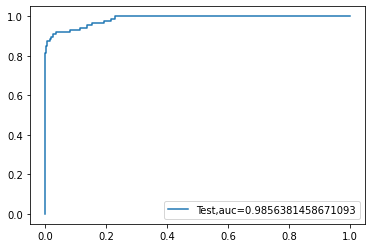

l1_rocValues: 0.9449181675645983
l1_threshold: 0.009720595795706756
ROC_test_dataset 94.5%


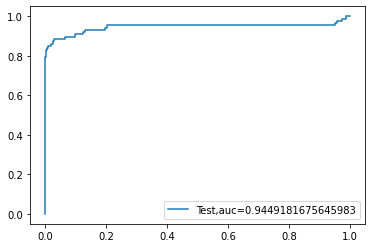

Time Taken by Model: --- 354.9622974395752 seconds ---
--------------------------------------------------------------------------------


In [ ]:
# Running and Checking Logistic Regression with L1 And L2 Regularisation using above KFold
import time
print("Logistic Regression")
start_time = time.time()
Data_Results = build_Run_Logistic_model(Data_Results,"Power Transformer",X_train_CV,y_train_CV, X_test_CV, y_test_CV)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

# KNN Model

In [ ]:
def build_Run_KNN_model(Data_Results,DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate KNN  model
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import roc_auc_score
    #create KNN model and fit the model with train dataset
    knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
    knn.fit(X_train,y_train)
    score = knn.score(X_test,y_test)
    print("model score")
    print(score)
    
    #Accuracy
    y_pred = knn.predict(X_test)
    KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
    print("Confusion Matrix")
    plot_confusion_matrix(y_test, y_pred)
  

    knn_probs = knn.predict_proba(X_test)[:, 1]
  
    # Calculate roc auc
    knn_roc_value = roc_auc_score(y_test, knn_probs)
    print("KNN roc_value: {0}" .format(knn_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("KNN threshold: {0}".format(threshold))
  
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    Data_Results = Data_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
  
    return Data_Results

KNN_Model
model score
0.9993504441557529
Confusion Matrix


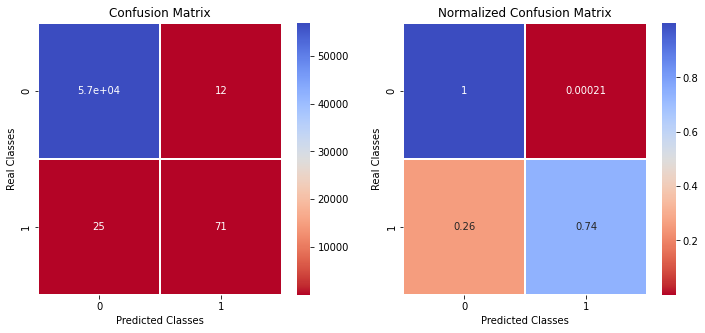

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.86      0.74      0.79        96

    accuracy                           1.00     56962
   macro avg       0.93      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962

KNN roc_value: 0.9008513435093026
KNN threshold: 0.2
ROC for the test dataset 90.1%


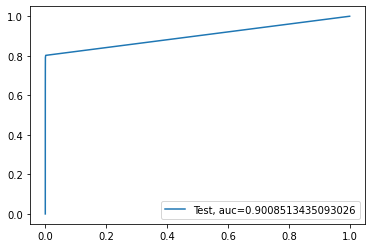

Time Taken by Model: --- 1276.4518132209778 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Running KNN Model
print("KNN_Model")
start_time = time.time()
df_Results = build_Run_KNN_model(Data_Results,"Power Transformer",X_train_pt,y_train, X_test_pt, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


KNN Model
model score
0.9992626533944278
Confusion Matrix


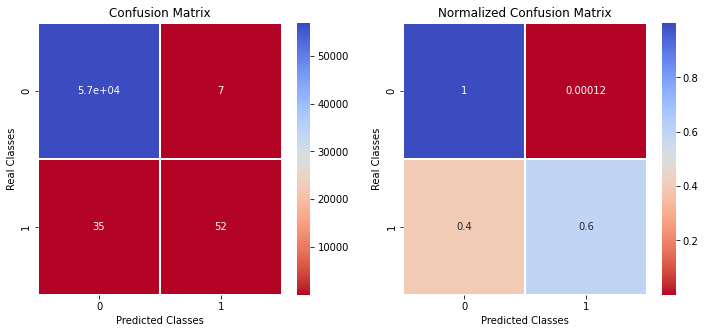

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.88      0.60      0.71        87

    accuracy                           1.00     56961
   macro avg       0.94      0.80      0.86     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8560991245418891
KNN threshold: 0.2
ROC for the test dataset 85.6%


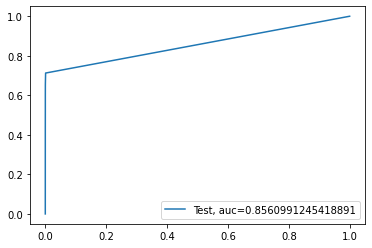

Time Taken by Model: --- 1351.1627447605133 seconds ---
--------------------------------------------------------------------------------


In [ ]:
# Cross VAlidation woih Repeated KFOld
#Running KNN Model
print("KNN Model")
start_time = time.time()
df_Results = build_Run_KNN_model(Data_Results,"RepeatedKFold Cross Validation",X_train_CV,y_train_CV, X_test_CV, y_test_CV)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

# Now Building a model with SVM

In [ ]:
def build_Run_SVM_model(Data_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluating SVM model with sigmoid kernel  model
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import roc_auc_score
  
    clf = SVC(kernel='sigmoid', random_state=42)
    clf.fit(X_train,y_train)
    y_pred_SVM = clf.predict(X_test)
    SVM_Score = accuracy_score(y_test,y_pred_SVM)
    print("accuracy_score : {0}".format(SVM_Score))
    print("Confusion Matrix")
    plot_confusion_matrix(y_test, y_pred_SVM)
  
  
  
    # Run classifier
    classifier = SVC(kernel='sigmoid' , probability=True)
    svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]
  
    # Calculate ROC AUC
    roc_value = roc_auc_score(y_test, svm_probs)
    
    print("SVM roc_value: {0}" .format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("SVM threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
  
    Data_Results = Data_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return Data_Results

SVM Model with Sigmoid Kernel
accuracy_score : 0.9985779993679997
Confusion Matrix


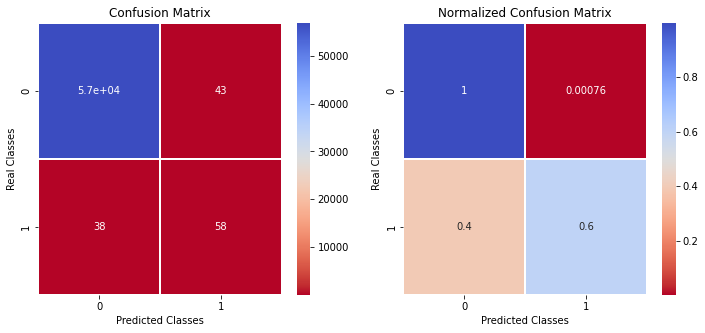

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.57      0.60      0.59        96

    accuracy                           1.00     56962
   macro avg       0.79      0.80      0.79     56962
weighted avg       1.00      1.00      1.00     56962

SVM roc_value: 0.8876203120786879
SVM threshold: 0.001521718932865385
ROC for the test dataset 88.8%


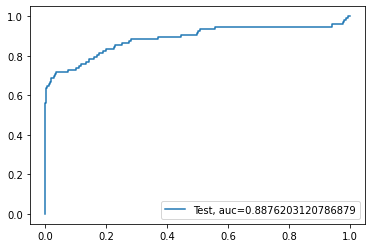

Time Taken by Model: --- 117.12822532653809 seconds ---


In [ ]:
#Running SVM Model with Sigmoid Kernel

print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = build_Run_SVM_model(Data_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

SVM Model with Sigmoid Kernel
accuracy_score : 0.998419971559488
Confusion Matrix


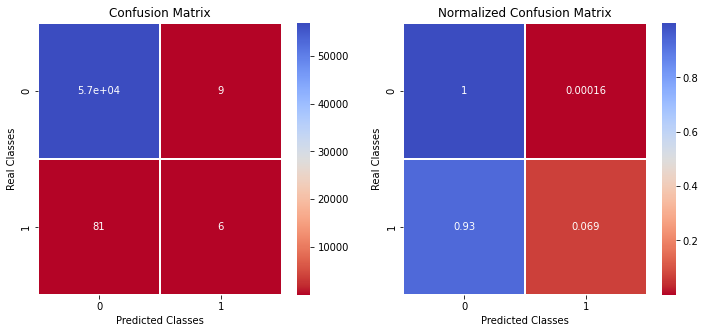

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.40      0.07      0.12        87

    accuracy                           1.00     56961
   macro avg       0.70      0.53      0.56     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.46852732335523695
SVM threshold: 0.0018454359216086328
ROC for the test dataset 46.9%


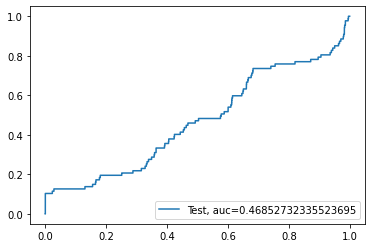

Time Taken by Model: --- 834.5149302482605 seconds ---


In [ ]:
#Running SVM Model with Sigmoid Kernel

print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = build_Run_SVM_model(Data_Results,"Power Transformer",X_train_CV,y_train_CV, X_test_CV, y_test_CV)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

# Now Building a model with Decision TREE

In [ ]:
# Create the parameter grid 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pt,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.264721,0.005949,0.027100,0.000280,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933337,0.933183,0.923868,0.930129,0.004428,4
1,4.248808,0.017136,0.026639,0.000667,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933337,0.933180,0.923870,0.930129,0.004426,5
2,4.273061,0.012019,0.027983,0.001759,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933279,0.936720,0.944598,0.938199,0.004738,1
3,4.234761,0.004154,0.026550,0.000389,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933279,0.936720,0.944598,0.938199,0.004738,1
4,8.445060,0.029301,0.028859,0.000301,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.924923,0.923923,0.930462,0.926436,0.002876,6
5,8.466103,0.023730,0.029021,0.000312,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.917507,0.916440,0.937983,0.923977,0.009913,8
6,8.368247,0.017014,0.029338,0.000538,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.933408,0.919653,0.921760,0.924940,0.006049,7
7,8.329904,0.018812,0.029102,0.000118,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.933448,0.919693,0.944095,0.932412,0.009989,3


In [ ]:
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9381990877679894
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


In [ ]:
# Model with optimal hyperparameters
dt_bal_rus_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_rus_model.fit(X_train_pt, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [ ]:
# Predictions on the train set
y_train_pred = dt_bal_rus_model.predict(X_train_pt)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227387     62]
 [   105    291]]


In [ ]:
# Predictions on the test set
y_train_pred = dt_bal_rus_model.predict(X_test_pt)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_train_pred)
print(confusion)

[[56833    33]
 [   34    62]]


In [ ]:
y_test_pred = dt_bal_rus_model.predict(X_test_pt)

Decision Tree: 0.8226265108617922
Decision Tree: 1
ROC for the train dataset 82.3%


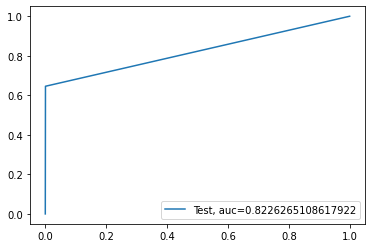

In [ ]:
# ROC on test
from sklearn.metrics import roc_auc_score
roc_value = roc_auc_score(y_test, y_train_pred)
print("Decision Tree: {0}" .format(roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_train_pred)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Decision Tree: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the train dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [ ]:
#Running Decision Tree Model with Sigmoid Kernel
dt_bal_rus_model.fit(X_train_CV, y_train_CV)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [ ]:
# Predictions on the train set
y_train_pred = dt_bal_rus_model.predict(X_train_CV)
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_CV, y_train_pred)
print(confusion)

[[227363     78]
 [    71    334]]


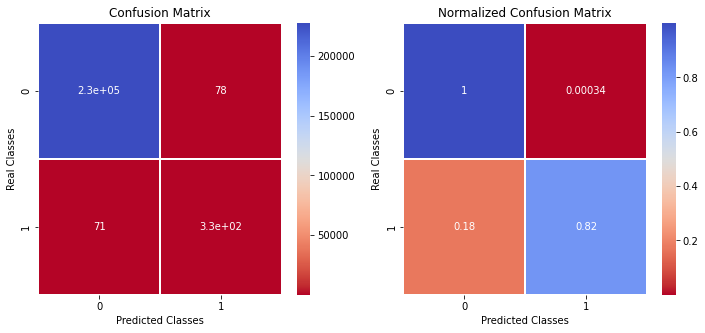

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227441
           1       0.81      0.82      0.82       405

    accuracy                           1.00    227846
   macro avg       0.91      0.91      0.91    227846
weighted avg       1.00      1.00      1.00    227846



In [ ]:
plot_confusion_matrix(y_train_CV, y_train_pred)

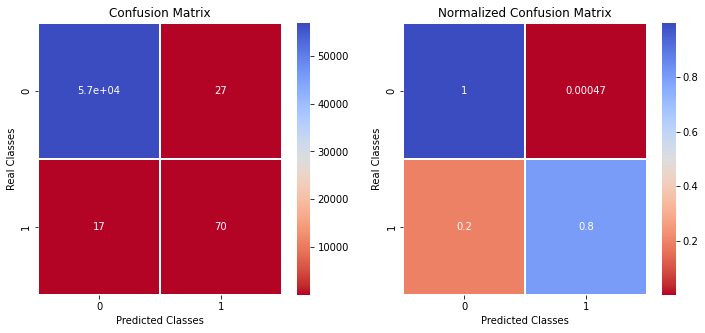

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.72      0.80      0.76        87

    accuracy                           1.00     56961
   macro avg       0.86      0.90      0.88     56961
weighted avg       1.00      1.00      1.00     56961



In [ ]:
# Predictions on the test set
y_test_pred = dt_bal_rus_model.predict(X_test_CV)

plot_confusion_matrix(y_test_CV, y_test_pred)

Decision Tree: 0.9121742059709854
Decision tree: 1
ROC for the train dataset 91.2%


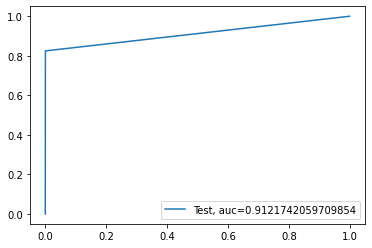

In [ ]:
# ROC on test
from sklearn.metrics import roc_auc_score
roc_value = roc_auc_score(y_train_CV, y_train_pred)
print("Decision Tree: {0}" .format(roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_train_CV, y_train_pred)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Decision tree: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the train dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

Decision Tree: 0.9020614837638677
Decision Tree: 1
ROC for the test dataset 90.2%


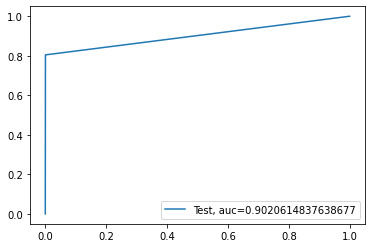

In [ ]:
# ROC on test
roc_value = roc_auc_score(y_test_CV, y_test_pred)
print("Decision Tree: {0}" .format(roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test_CV, y_test_pred)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Decision Tree: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

# Now Building a model with Random Forest

In [ ]:
#Initializing Random forest and creating model

from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_jobs=-1, 
                             random_state=2018,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)

In [ ]:
# Fitting the model on Train data and Predicting on Test data

model_rfc.fit(X_train_pt,y_train)
y_predicted = model_rfc.predict(X_test_pt)

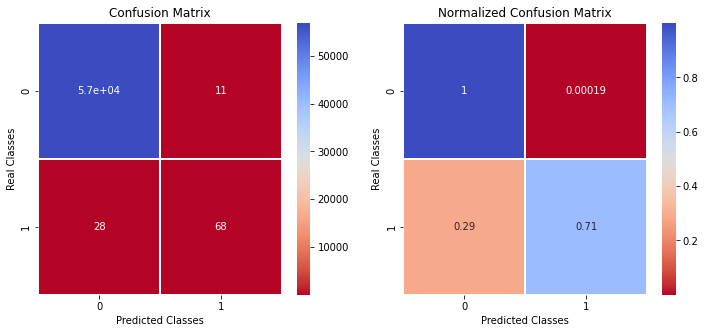

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.86      0.71      0.78        96

    accuracy                           1.00     56962
   macro avg       0.93      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Predictions on the test set

plot_confusion_matrix(y_test, y_predicted)

Random Forest: 0.8540699480650419
Random Forest: 1
ROC for the test dataset 85.4%


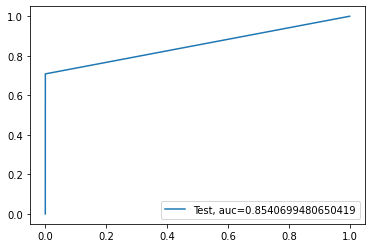

In [ ]:
# ROC on test
roc_value = roc_auc_score(y_test, y_predicted)
print("Random Forest: {0}" .format(roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Random Forest: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

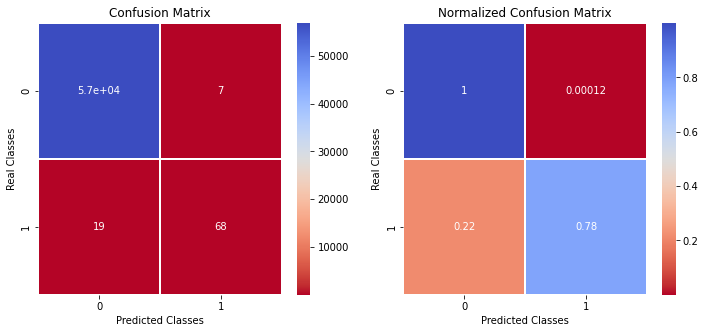

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.91      0.78      0.84        87

    accuracy                           1.00     56961
   macro avg       0.95      0.89      0.92     56961
weighted avg       1.00      1.00      1.00     56961



In [ ]:
# Fitting the model on Train data and Predicting on Test data
# Cross Validation with Repeated KFold

model_rfc.fit(X_train_CV,y_train_CV)
y_predicted = model_rfc.predict(X_test_CV)

# Predictions on the test set

plot_confusion_matrix(y_test_CV, y_predicted)

Random Forest: 0.8907430581575969
Random Forest: 1
ROC for the test dataset 89.1%


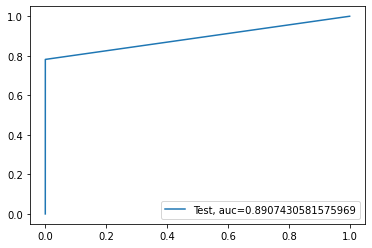

In [ ]:
# ROC on test
roc_value = roc_auc_score(y_test_CV, y_predicted)
print("Random Forest: {0}" .format(roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test_CV, y_predicted)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Random Forest: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

# Now Building a model with XGBoost

In [ ]:
def build_Run_XGBoost_model(Data_Results, DataImabalance,X_train,y_train, X_test, y_test ):
#Evaluating XGboost model
    from xgboost import XGBClassifier
    from sklearn.metrics import roc_auc_score
# fit model no training data
    XGBmodel = XGBClassifier(random_state=42)
    XGBmodel.fit(X_train, y_train)
    y_pred = XGBmodel.predict(X_test)
  
    XGB_test_score = XGBmodel.score(X_test, y_test)
    print('Model Accuracy: {0}'.format(XGB_test_score))
  
    print("Confusion Matrix")
    plot_confusion_matrix(y_test, y_pred)
    print("classification Report")
    print(classification_report(y_test, y_pred))
# Probabilities for each class
    XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]
  
 #  Calculate roc auc
    XGB_roc_value = roc_auc_score(y_test, XGB_probs)
  
    print("XGboost roc_value: {0}" .format(XGB_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("XGBoost threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    Data_Results = Data_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
  
    return Data_Results

XGBoost Model
Model Accuracy: 0.9993504441557529
Confusion Matrix


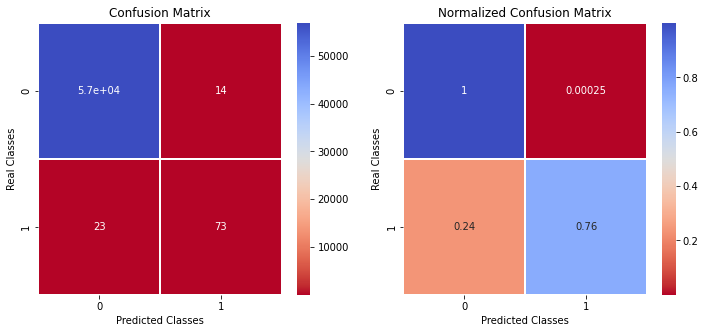

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.84      0.76      0.80        96

    accuracy                           1.00     56962
   macro avg       0.92      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.84      0.76      0.80        96

    accuracy                           1.00     56962
   macro avg       0.92      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962

XGboost roc_value: 0.9762384560487227
XGBoost threshold: 0.0008324346854351461
ROC for the test dataset 97.6%


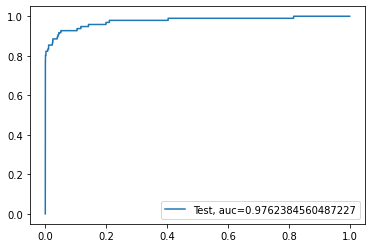

Time Taken by Model: --- 54.9586615562439 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Running XGBoost Model:

print("XGBoost Model")
start_time = time.time()
df_Results = build_Run_XGBoost_model(Data_Results,"Power Transformer",X_train_pt,y_train, X_test_pt, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

XGBoost Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


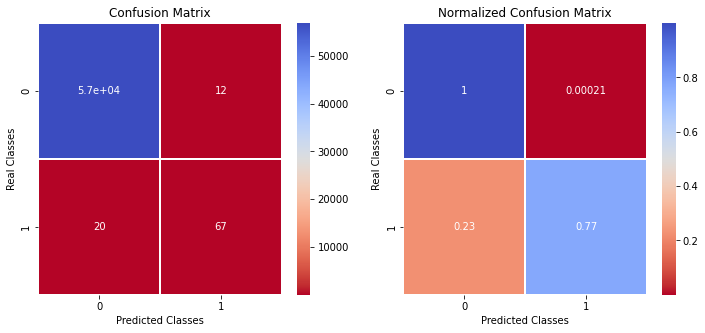

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.85      0.77      0.81        87

    accuracy                           1.00     56961
   macro avg       0.92      0.88      0.90     56961
weighted avg       1.00      1.00      1.00     56961

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.85      0.77      0.81        87

    accuracy                           1.00     56961
   macro avg       0.92      0.88      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9831665601598047
XGBoost threshold: 0.0012481784215196967
ROC for the test dataset 98.3%


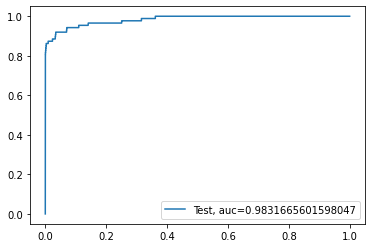

Time Taken by Model: --- 54.44304823875427 seconds ---
--------------------------------------------------------------------------------


In [ ]:
# Cross Validation with Repeated KFold
#Running XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = build_Run_XGBoost_model(Data_Results,"RepeatedKFold Cross Validation",X_train_CV,y_train_CV, X_test_CV, y_test_CV)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

## By looking at above all results we found that XGBoost model is working way more better than other models.

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

### Hyperparameter Tunning

In [ ]:
from xgboost import XGBClassifier
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
clf = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
clf.fit(X_train_pt, y_train)


#print the evaluation score on the X_test by choosing the best evaluation metric
print("\n\n\n\n\n")
print("Best roc auc score : ", clf.best_score_)
print(clf.best_estimator_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits






Best roc auc score :  0.9776928086143927
XGBClassifier(learning_rate=0.2, max_depth=2, n_estimators=200, subsample=0.3)


In [ ]:
# Printing best params
clf.best_params_

{'learning_rate': 0.2, 'subsample': 0.3}

### XGBoost model with optimal hyperparameter

In [ ]:
# Printing best params
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
          'objective':'binary:logistic'}

# fit model on training data
clf = XGBClassifier(params = params)
clf.fit(X_train_pt, y_train)

XGBClassifier(params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3})

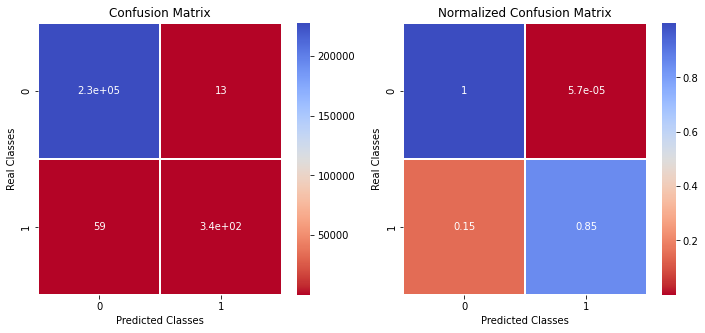

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.96      0.85      0.90       396

    accuracy                           1.00    227845
   macro avg       0.98      0.93      0.95    227845
weighted avg       1.00      1.00      1.00    227845



In [ ]:
# Predictions on the train set
y_train_pred = clf.predict(X_train_pt)

plot_confusion_matrix(y_train, y_train_pred)

In [ ]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


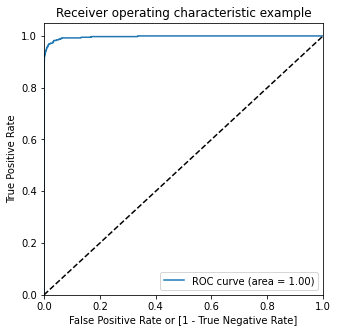

In [ ]:
# Predicted probability
y_train_pred_proba_imb_xgb = clf.predict_proba(X_train_pt)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

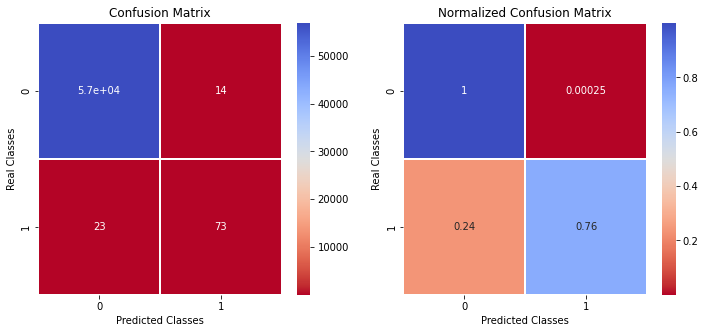

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.84      0.76      0.80        96

    accuracy                           1.00     56962
   macro avg       0.92      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Predictions on the test set
y_test_pred = clf.predict(X_test_pt)
plot_confusion_matrix(y_test, y_test_pred)

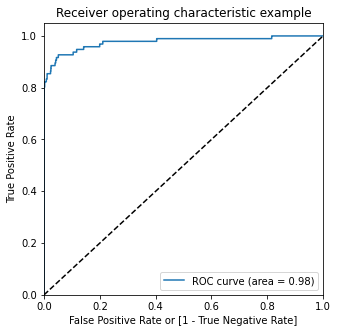

In [ ]:
# Predicted probability
y_test_pred_proba = clf.predict_proba(X_test_pt)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### XGBoost model giving good performance

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

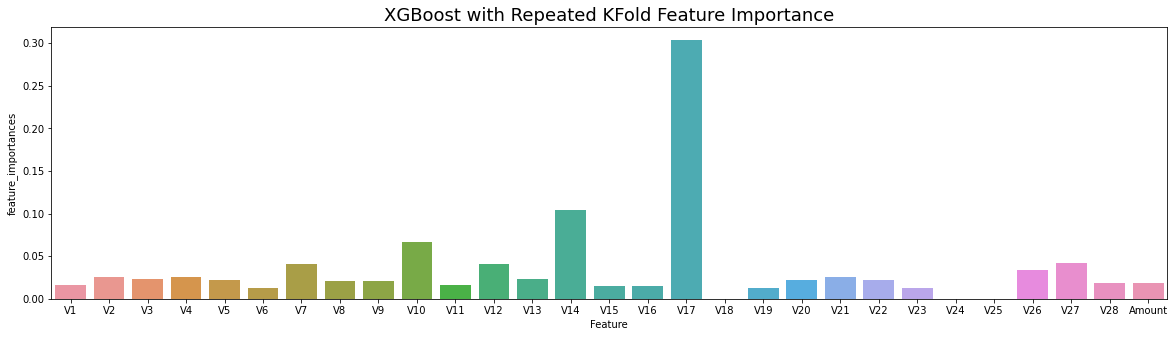

In [ ]:
Coeef_ = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(clf.feature_importances_))], axis = 1)
Coeef_.columns = ['Feature','feature_importances']

plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='feature_importances', data=Coeef_)
plt.title("XGBoost with Repeated KFold Feature Importance", fontsize=18)
plt.show()

Top var = 17
2nd Top var = 14
3rd Top var = 10


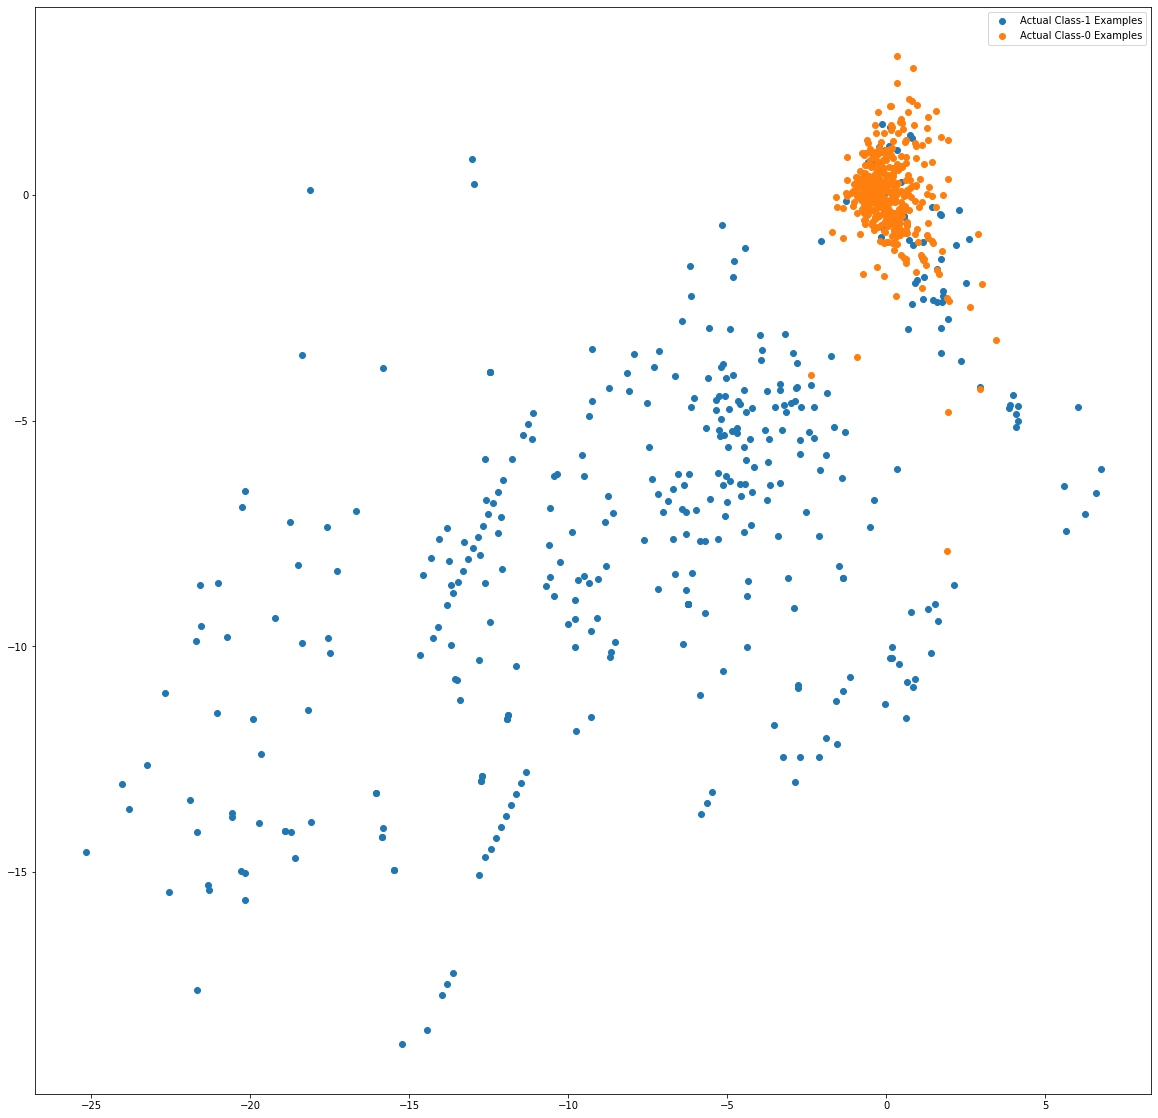

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Random Oversampling

In [9]:
from imblearn.over_sampling import RandomOverSampler
import joblib

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [10]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_over))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227449})


## Model Building
- Build different models on the balanced dataset and see the result

## Building logistic regression with random oversampled data

In [ ]:
# Logistic Regression

# Creating KFold object with 5 splits
from sklearn import model_selection 
from sklearn.linear_model import LogisticRegression

folds = model_selection.KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_over, y_over)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.987772099245119
Best hyperparameters:  {'C': 10}


#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [ ]:
# cross validation results
CV_O_P = pd.DataFrame(model_cv.cv_results_)
CV_O_P

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.661423,0.514515,0.049763,0.000519,0.01,{'C': 0.01},0.987745,0.987246,0.986944,0.987245,...,0.987359,0.000287,5,0.987824,0.987388,0.987290,0.987211,0.987158,0.987374,0.000238
1,8.618384,0.299020,0.050736,0.001100,0.1,{'C': 0.1},0.987959,0.987285,0.987086,0.987498,...,0.987513,0.000311,3,0.988015,0.987407,0.987425,0.987497,0.987268,0.987523,0.000257
2,8.773005,0.215497,0.050522,0.000747,1,{'C': 1},0.987260,0.987347,0.987016,0.987360,...,0.987462,0.000450,4,0.987303,0.987441,0.987361,0.987309,0.987915,0.987466,0.000230
3,8.931919,0.199566,0.049836,0.000210,10,{'C': 10},0.987667,0.988620,0.987483,0.987468,...,0.987772,0.000431,1,0.987721,0.988710,0.987812,0.987411,0.987162,0.987763,0.000527
4,8.655105,0.351345,0.050861,0.000385,100,{'C': 100},0.987742,0.987164,0.987504,0.987478,...,0.987515,0.000203,2,0.987795,0.987316,0.987834,0.987444,0.987239,0.987526,0.000245
5,8.621839,0.353204,0.051084,0.001023,1000,{'C': 1000},0.987312,0.987217,0.987122,0.987092,...,0.987263,0.000172,6,0.987394,0.987322,0.987459,0.987042,0.987084,0.987260,0.000167


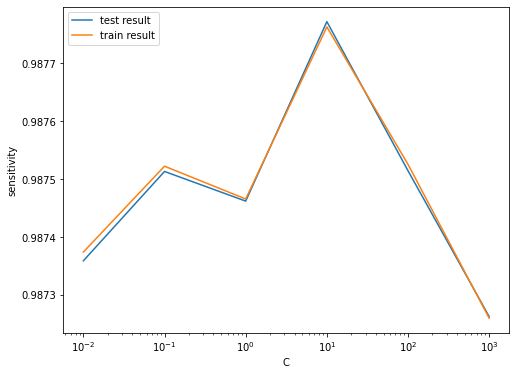

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(CV_O_P['param_C'], CV_O_P['mean_test_score'])
plt.plot(CV_O_P['param_C'], CV_O_P['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
## Logistic regression with hyperparameter tunning
model_cv.best_params_

{'C': 10}

In [ ]:
# Instantiating the model
logreg_over = LogisticRegression(C=0.1)

# Fitting the model with train data
logreg_over_model = logreg_over.fit(X_over, y_over)

In [ ]:
# Predictions on the train set
y_train_pred = logreg_over_model.predict(X_over)

In [ ]:
df_y_over, df_y_train_pred=pd.DataFrame(y_over),pd.DataFrame(y_train_pred)

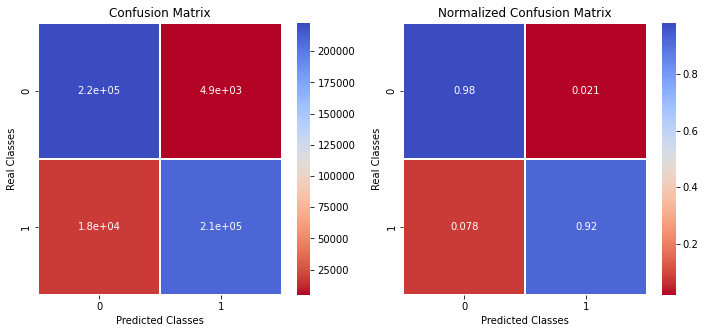

---Classification Report---
              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.98      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



In [ ]:
# Printing scores
plot_confusion_matrix(df_y_over, df_y_train_pred)

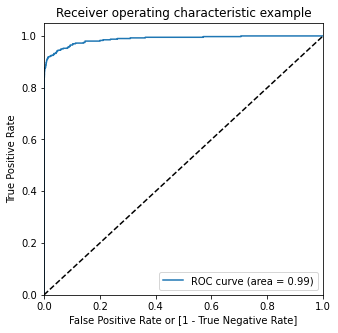

In [ ]:
# Predicted probability
y_train_pred_proba = logreg_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

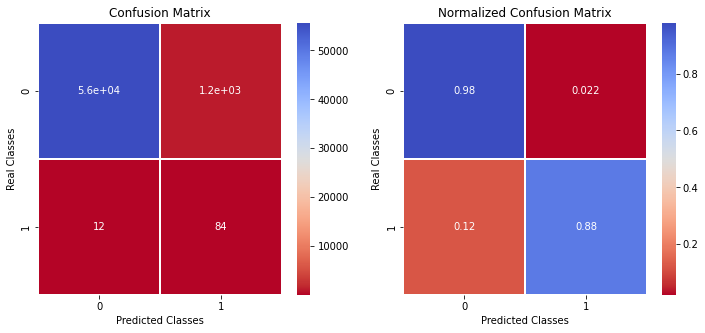

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.88      0.12        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [ ]:
# Evaluating on test data
y_test_pred = logreg_over_model.predict(X_test)

# Printing the scores
plot_confusion_matrix(y_test, y_test_pred)

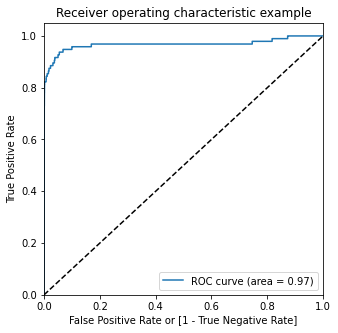

In [ ]:
# Predicted probability
y_test_pred_proba = logreg_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

KNN Model
model score
0.9989817773252344
Confusion Matrix


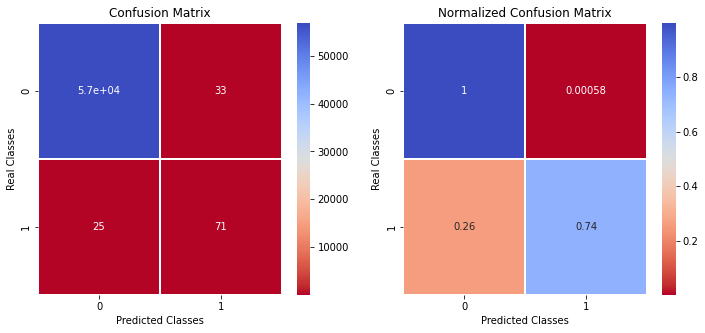

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.68      0.74      0.71        96

    accuracy                           1.00     56962
   macro avg       0.84      0.87      0.85     56962
weighted avg       1.00      1.00      1.00     56962

KNN roc_value: 0.874788794417285
KNN threshold: 0.2
ROC for the test dataset 87.5%


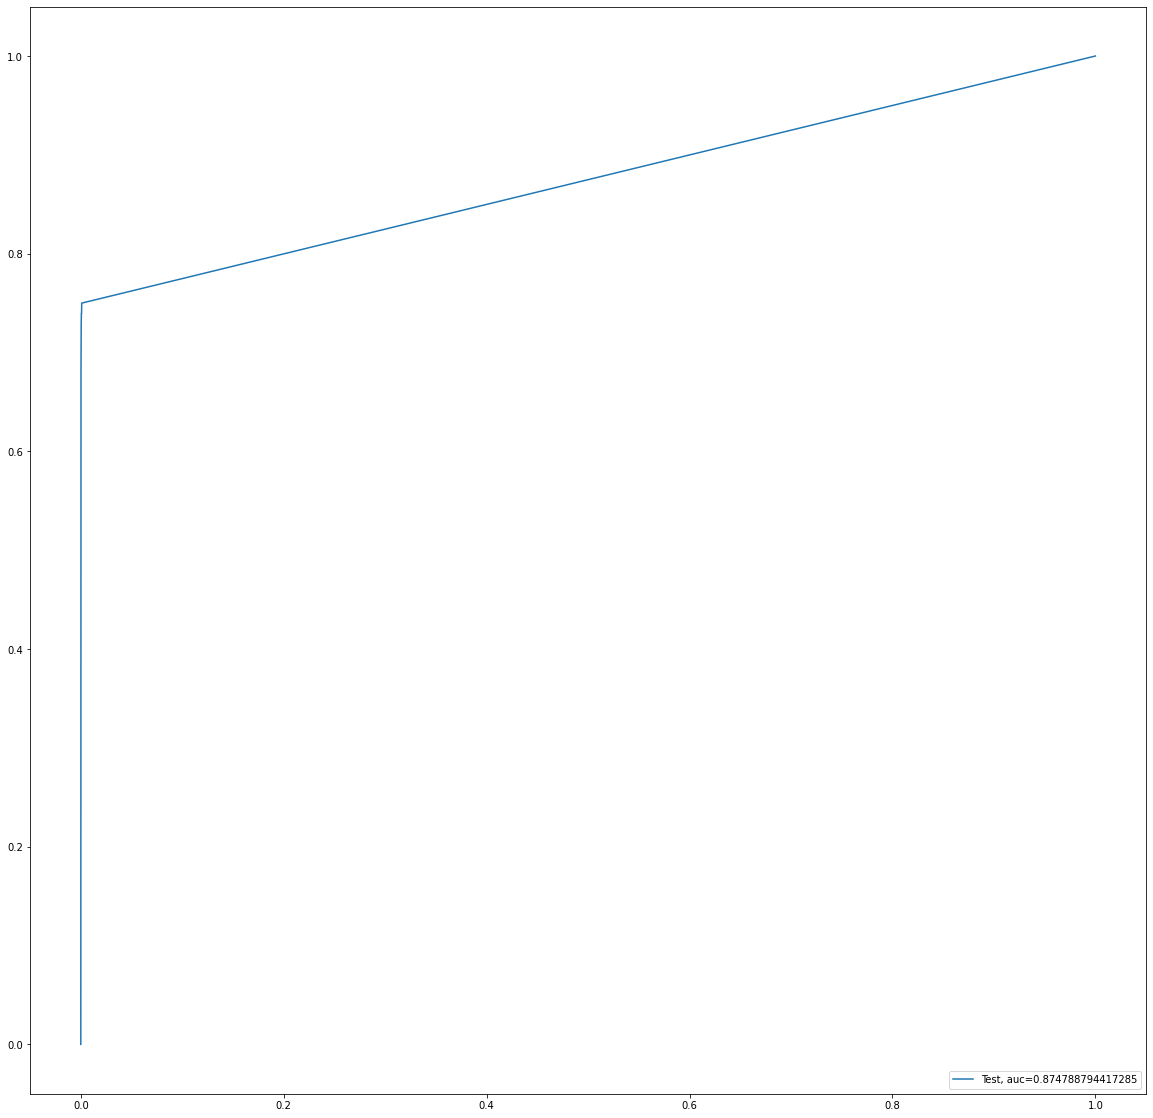

Time Taken by Model: --- 3232.2481741905212 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Running KNN Model:
Data_Imbalance_Handiling = "Random Oversampling with StratifiedKFold CV "
print("KNN Model")
start_time = time.time()
Data_Results = build_Run_KNN_model(Data_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [ ]:
#Running Decision Tree Models :

start_time = time.time()
DT_model = dt_bal_rus_model.fit(X_over, y_over)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Time Taken by Model: --- 8.00061297416687 seconds ---
--------------------------------------------------------------------------------


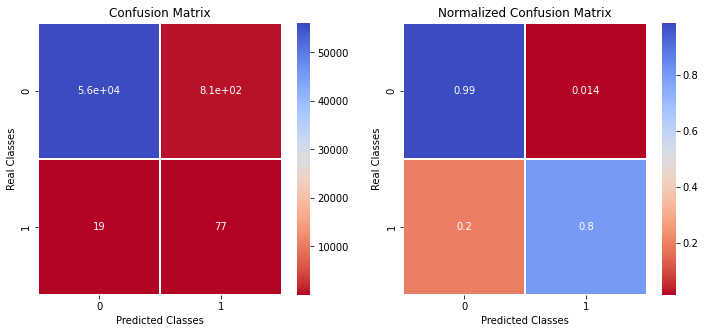

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.09      0.80      0.16        96

    accuracy                           0.99     56962
   macro avg       0.54      0.89      0.57     56962
weighted avg       1.00      0.99      0.99     56962



In [ ]:
# Evaluating on test data
y_test_pred = DT_model.predict(X_test)

# Printing the scores
plot_confusion_matrix(y_test, y_test_pred)

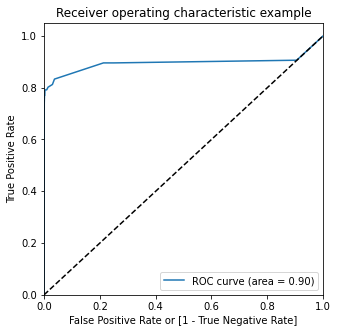

In [ ]:
# Predicted probability
y_test_pred_proba = DT_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

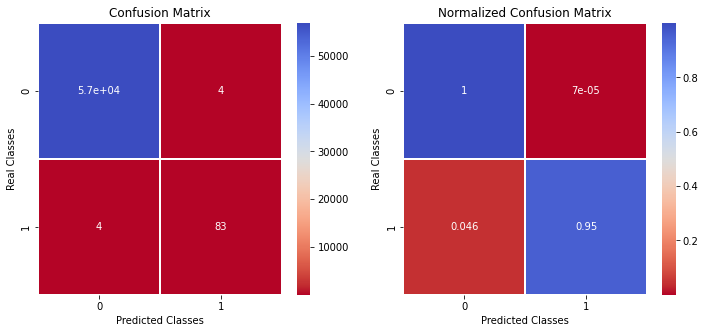

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.95      0.95      0.95        87

    accuracy                           1.00     56961
   macro avg       0.98      0.98      0.98     56961
weighted avg       1.00      1.00      1.00     56961



In [ ]:
# Random Forest with random oversampled data
# Fitting the model on Train data and Predicting on Test data
# Cross Validation with Repeated KFold

model_rfc.fit(X_over,y_over)
y_predicted = model_rfc.predict(X_test_CV)

# Predictions on the test set

plot_confusion_matrix(y_test_CV, y_predicted)

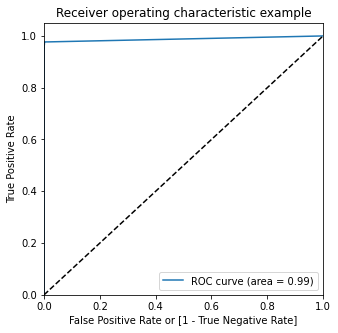

In [ ]:
# Predicted probability
y_test_pred_proba = model_rfc.predict_proba(X_test_CV)[:,1]

# Plot the ROC curve
draw_roc(y_test_CV, y_test_pred_proba)

In [ ]:
#Running XGBoost Model:
# fit model on training data

clf.fit(X_over,y_over)

XGBClassifier(params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3})

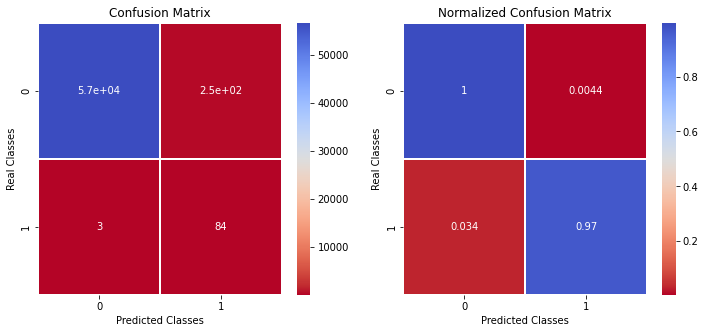

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.25      0.97      0.40        87

    accuracy                           1.00     56961
   macro avg       0.63      0.98      0.70     56961
weighted avg       1.00      1.00      1.00     56961



In [ ]:
# Predictions on the test set
y_test_pred = clf.predict(X_test_CV)
plot_confusion_matrix(y_test_CV, y_test_pred)

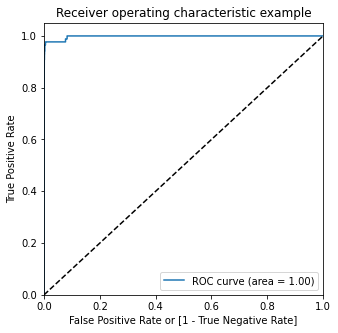

In [ ]:
# Predicted probability
y_test_pred_proba = clf.predict_proba(X_test_CV)[:,1]

# Plot the ROC curve
draw_roc(y_test_CV, y_test_pred_proba)

### Print the class distribution after applying SMOTE 

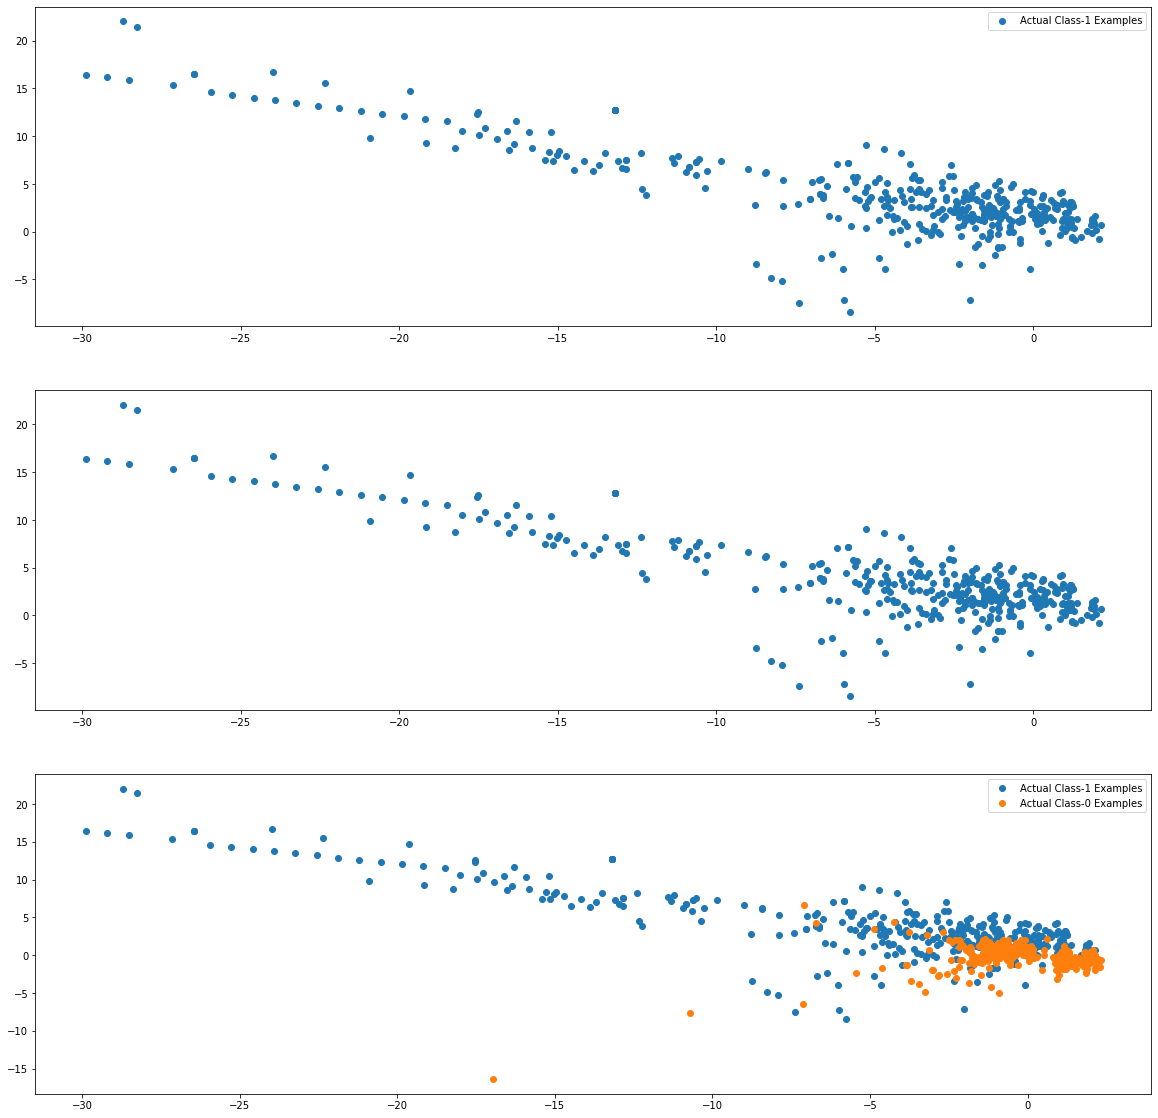

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from imblearn import over_sampling


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
#plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            #label='Artificial SMOTE Class-1 Examples')
#plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train)
  
    #Create Dataframe for X_over
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Maxim AUC & ROC for l2: 0.9929641198223441
Maxim AUC & ROC for l1: 0.5
Params of l2 regularisaationss
[[ 0.80688241  0.67062754  0.63171594  0.96518785  0.59359205 -0.71421318
  -0.73584207 -0.4769222  -0.4806641  -1.05513305  0.66599298 -1.23565892
  -0.25291359 -1.48993585  0.10330098 -0.73901726 -0.88321892 -0.49010896
   0.23027137 -1.12731076  0.00659971  0.58885162  0.39076779 -0.80784649
   0.49445353  0.09729925 -0.34697471  0.7827393   0.00893176]]
[-5.10175481]
{1: array([[0.64836479, 0.78425958, 0.92254271, 0.97072402, 0.98644967,
        0.98986219, 0.9907227 , 0.99156707, 0.9918703 , 0.99195672,
        0.99197031, 0.99197031, 0.99197031, 0.99197031, 0.99197031,
        0.99197031, 0.99197031, 0.99197031, 0.99197031, 0.99197031],
       [0.64535121, 0.78373587, 0.92493545, 0.97315935, 0.98817753,
        0.99119638, 0.99191793, 0.99270436, 0.99303367, 0.99312134,
        0.99313389, 0.99313389, 0.99313389, 0.99313389, 0.993

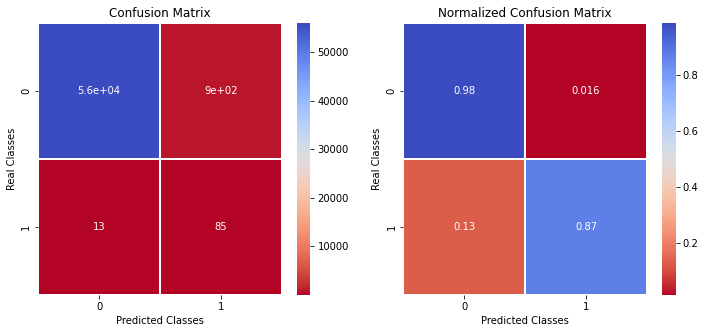

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.09      0.87      0.16        98

    accuracy                           0.98     56961
   macro avg       0.54      0.93      0.57     56961
weighted avg       1.00      0.98      0.99     56961

classification_Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.09      0.87      0.16        98

    accuracy                           0.98     56961
   macro avg       0.54      0.93      0.57     56961
weighted avg       1.00      0.98      0.99     56961

Accuarcies for Logistic Regression Models l1 regularisaationss : 0.9982795245869981
Confusionn_Matrices


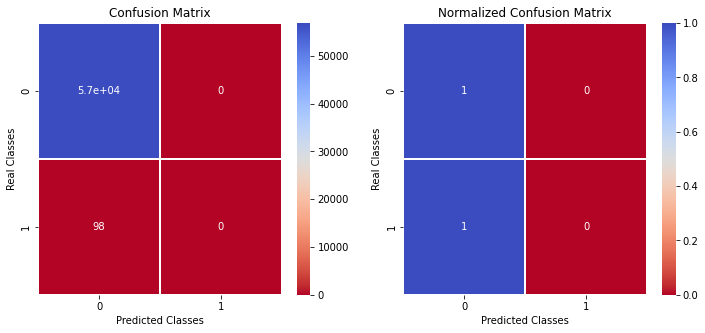

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2_rocValue: 0.9755970939102827
l2_threshold: 0.38133594400108095
ROC_test_Data 97.6%


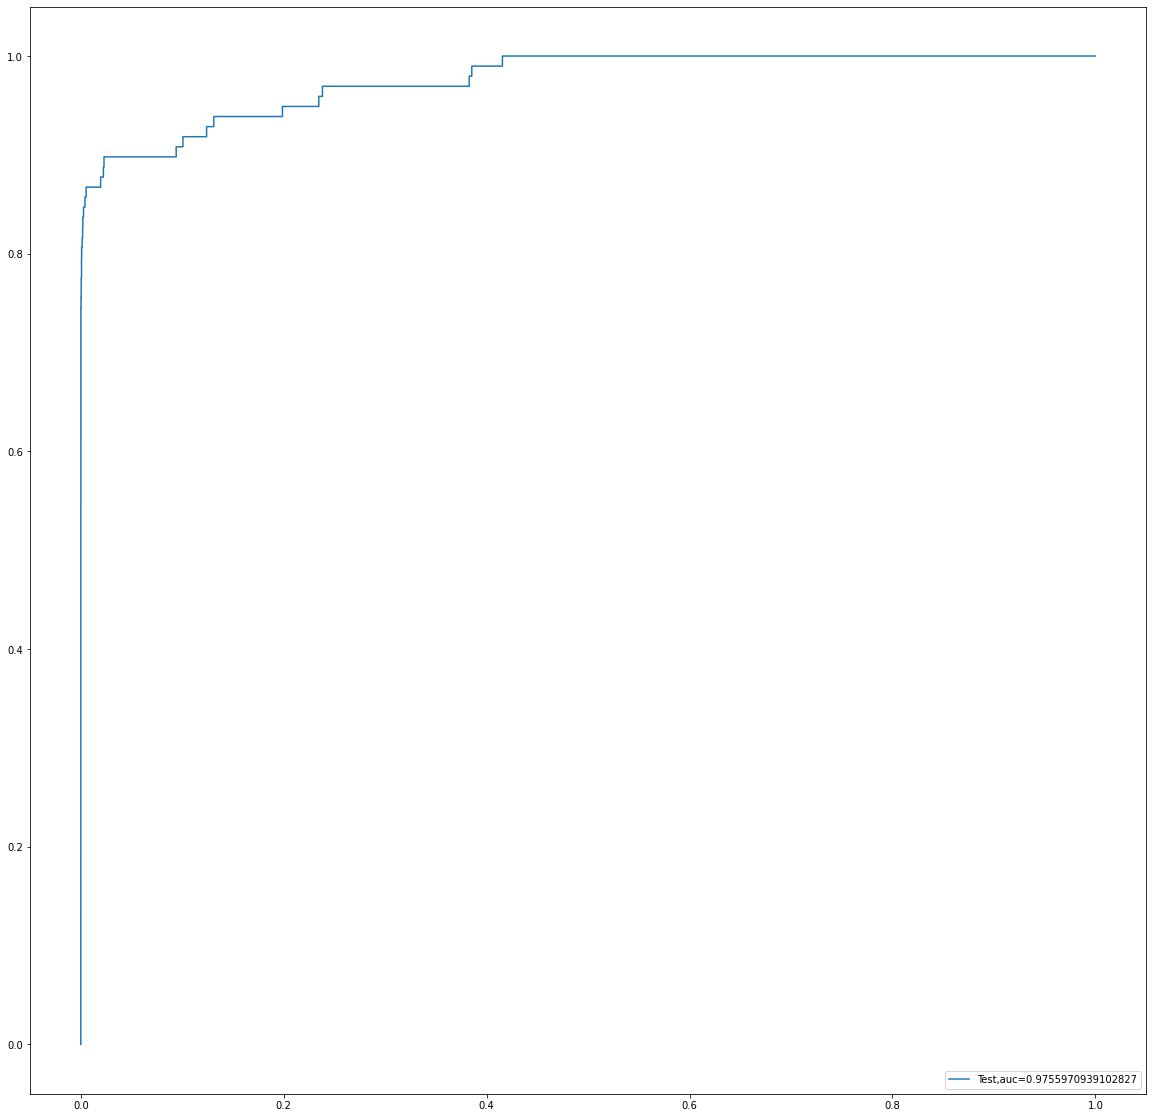

l1_rocValues: 0.5
l1_threshold: 1.5
ROC_test_dataset 50.0%


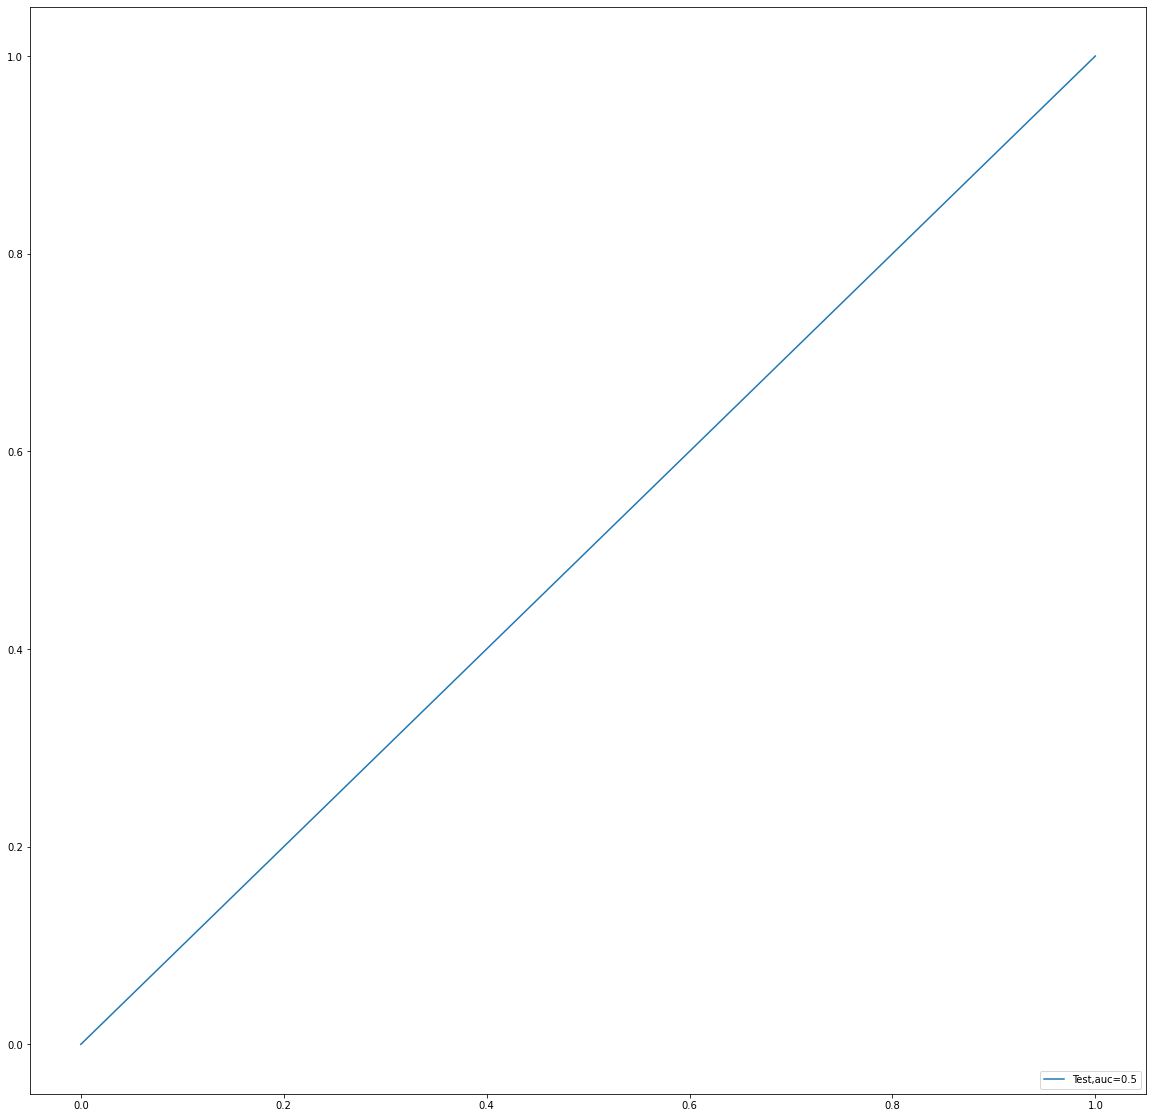

Time Taken by Model: --- 573.468513250351 seconds ---
--------------------------------------------------------------------------------


In [ ]:
Data_Imbalance_Handiling = "SMOTE Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
Data_Results = build_Run_Logistic_model(Data_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [ ]:
#KNN

KNN Model
model score
0.9962079317427713
Confusion Matrix


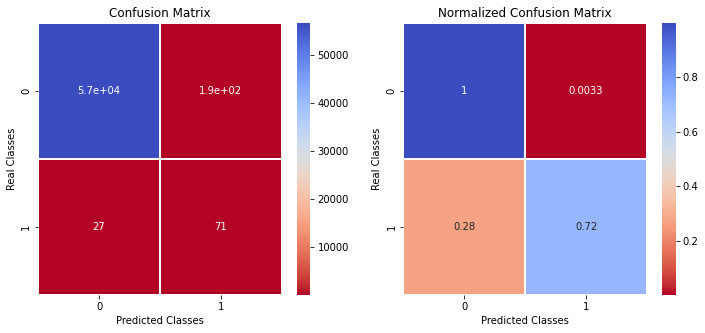

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.27      0.72      0.40        98

    accuracy                           1.00     56961
   macro avg       0.64      0.86      0.70     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8711781126639144
KNN threshold: 0.2
ROC for the test dataset 87.1%


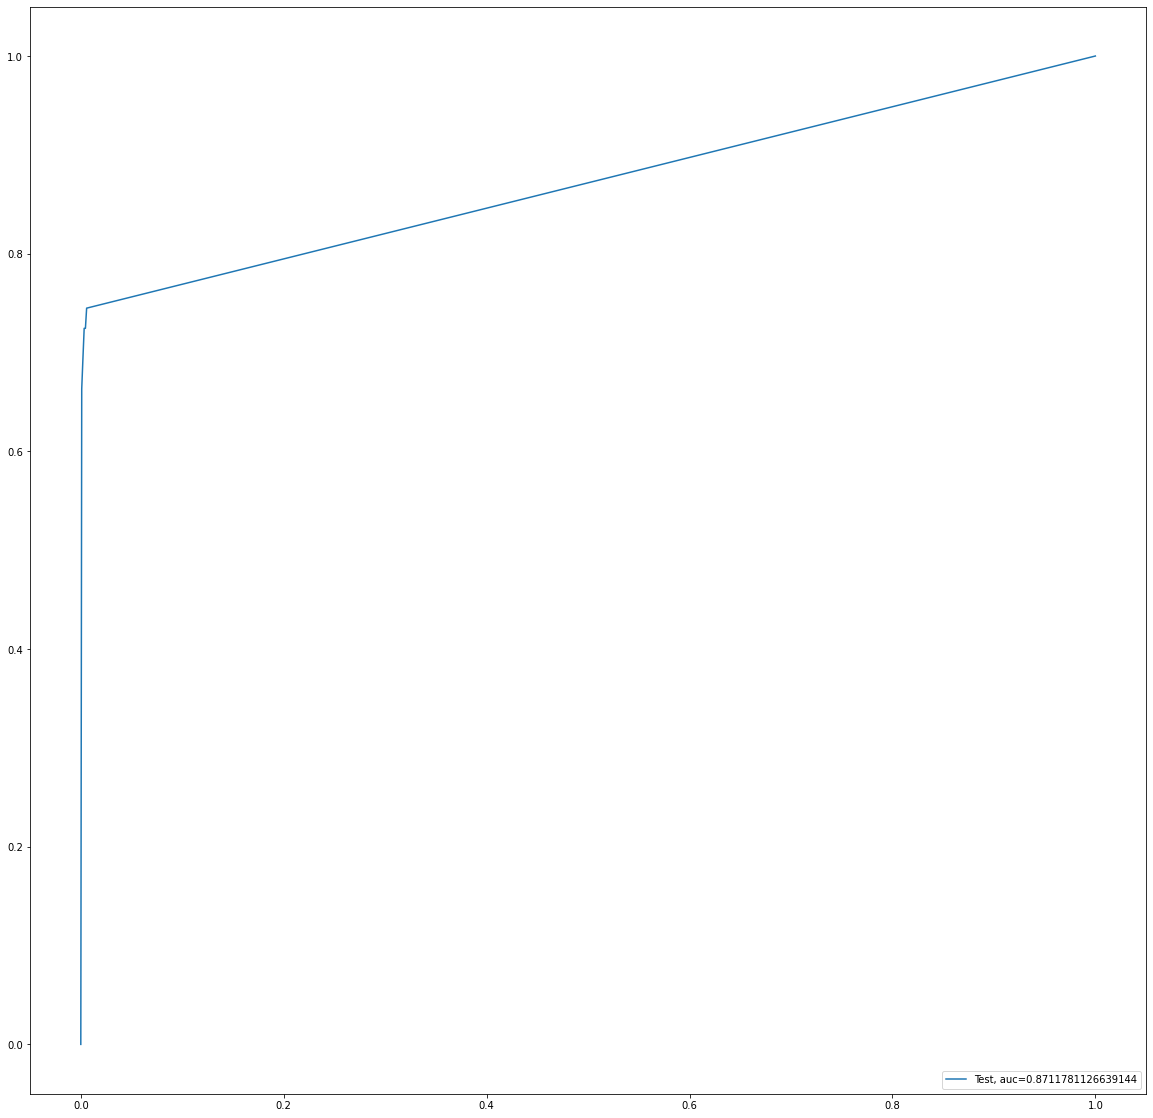

Time Taken by Model: --- 3512.8526072502136 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run KNN Model
print("KNN Model")
start_time = time.time()
Data_Results = build_Run_KNN_model(Data_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [ ]:
# Decision Tree

In [ ]:
# Decision Tree fitting
dt_bal_rus_model.fit(X_train_Smote, y_train_Smote)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

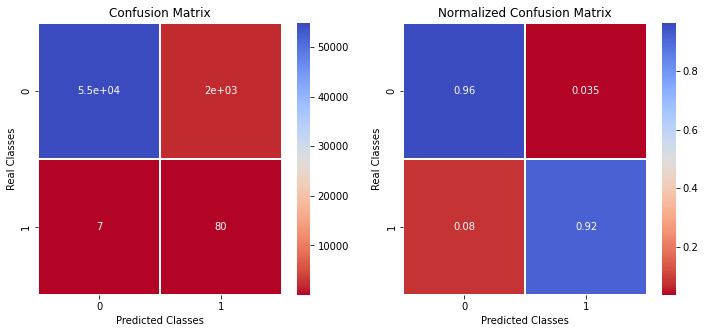

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56874
           1       0.04      0.92      0.07        87

    accuracy                           0.96     56961
   macro avg       0.52      0.94      0.53     56961
weighted avg       1.00      0.96      0.98     56961



In [ ]:
# Predictions on the test set
y_test_pred = dt_bal_rus_model.predict(X_test_CV)

plot_confusion_matrix(y_test_CV, y_test_pred)

In [ ]:
y_train_pred = dt_bal_rus_model.predict(X_train_Smote)

Decision Tree: 0.942222553666726
Decision Tree: 1
ROC for the test dataset 94.2%


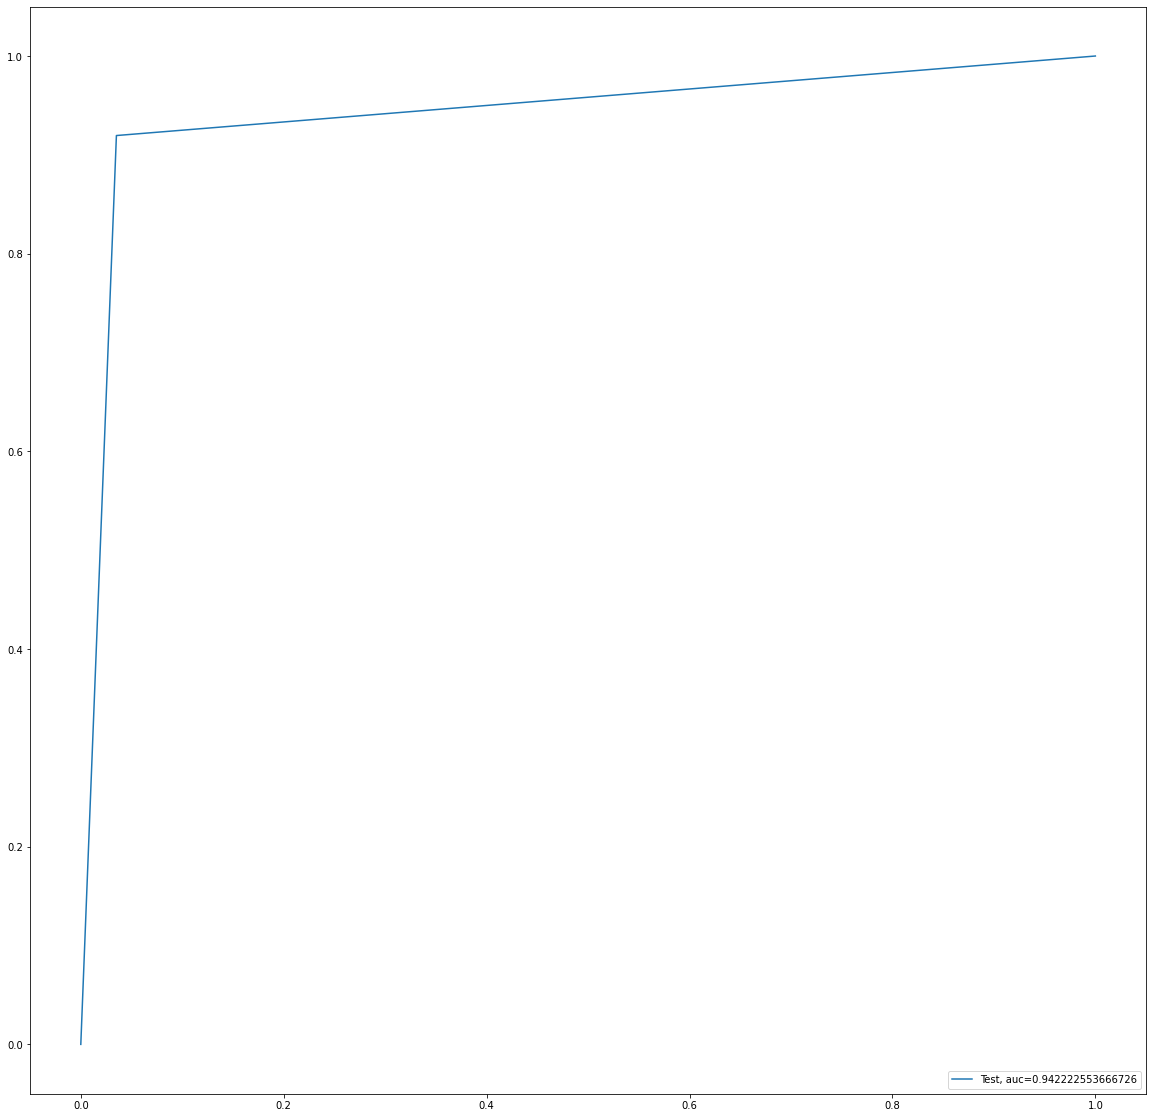

In [ ]:
# ROC on test
roc_value = roc_auc_score(y_test_CV, y_test_pred)
print("Decision Tree: {0}" .format(roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test_CV, y_test_pred)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Decision Tree: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# XGBoost

XGBoost Model
Model Accuracy: 0.993802777338881
Confusion Matrix


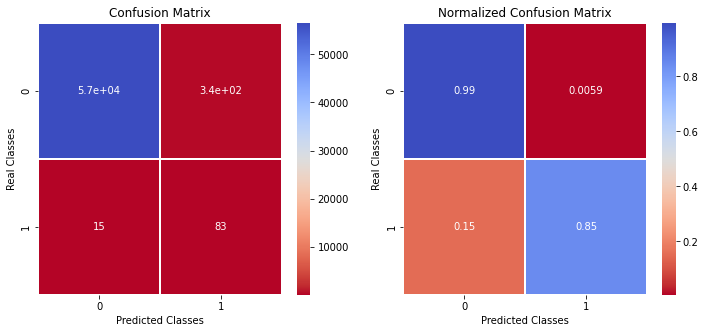

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.20      0.85      0.32        98

    accuracy                           0.99     56961
   macro avg       0.60      0.92      0.66     56961
weighted avg       1.00      0.99      1.00     56961

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.20      0.85      0.32        98

    accuracy                           0.99     56961
   macro avg       0.60      0.92      0.66     56961
weighted avg       1.00      0.99      1.00     56961

XGboost roc_value: 0.9838894916424618
XGBoost threshold: 0.2753082513809204
ROC for the test dataset 98.4%


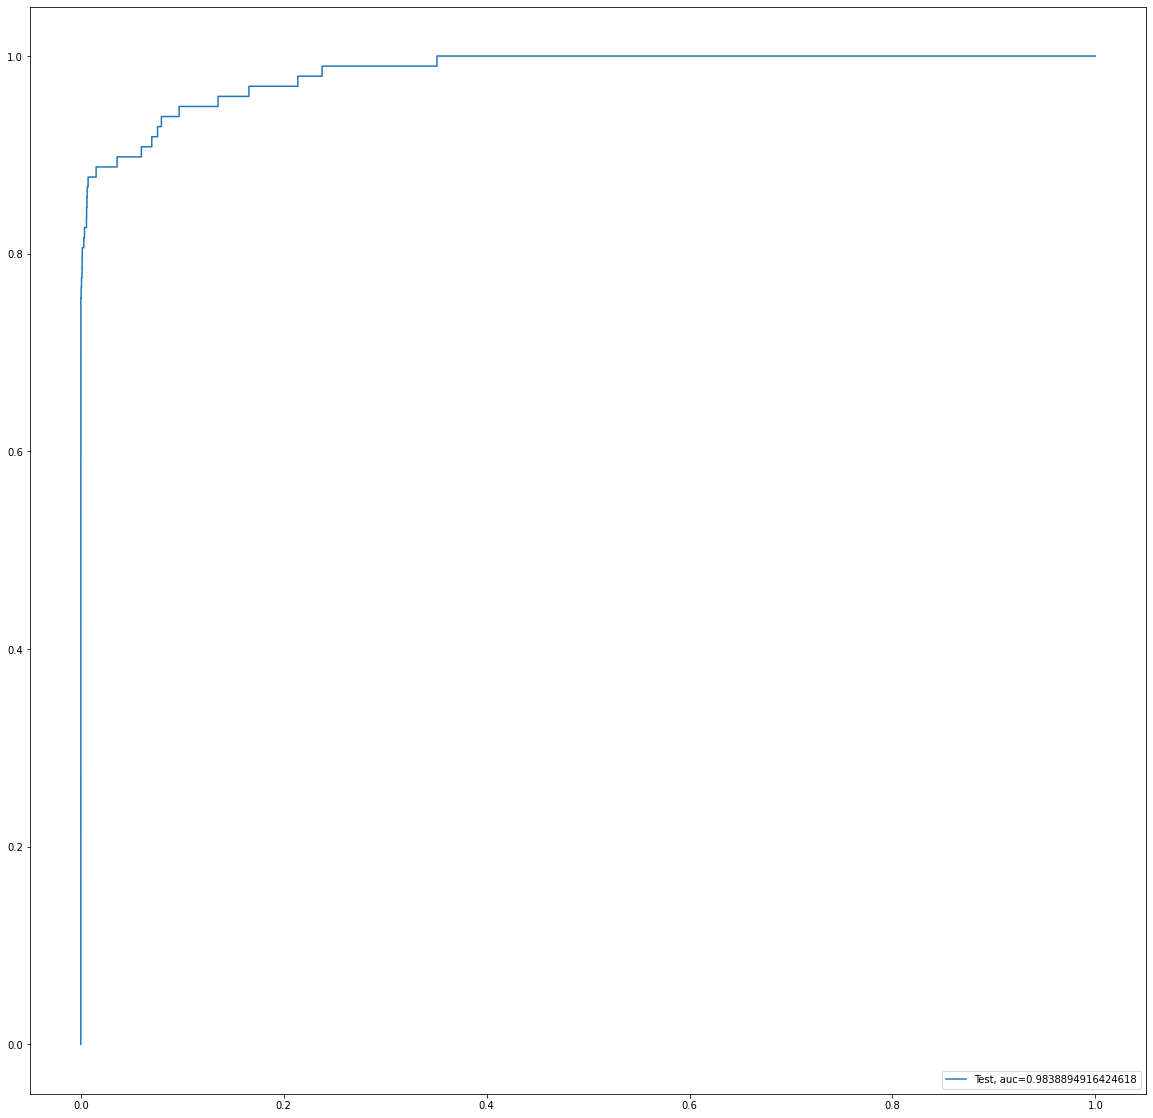

Time Taken by Model: --- 131.83128547668457 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
Data_Results = build_Run_XGBoost_model(Data_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


In [ ]:
# Random Forest

In [ ]:
#Run Random Forest Model
# Fitting the model on Train data and Predicting on Test data

model_rfc.fit(X_train_Smote,y_train_Smote)
y_predicted = model_rfc.predict(X_test)

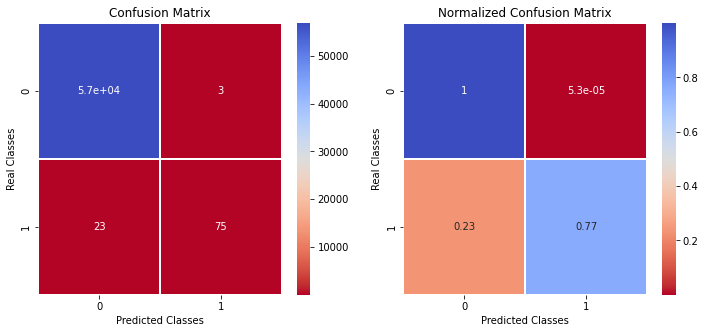

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.77      0.85        98

    accuracy                           1.00     56961
   macro avg       0.98      0.88      0.93     56961
weighted avg       1.00      1.00      1.00     56961



In [ ]:
# Predictions on the test set

plot_confusion_matrix(y_test, y_predicted)

Random Forest: 0.8826266820323966
Random Forest: 1
ROC for the test dataset 88.3%


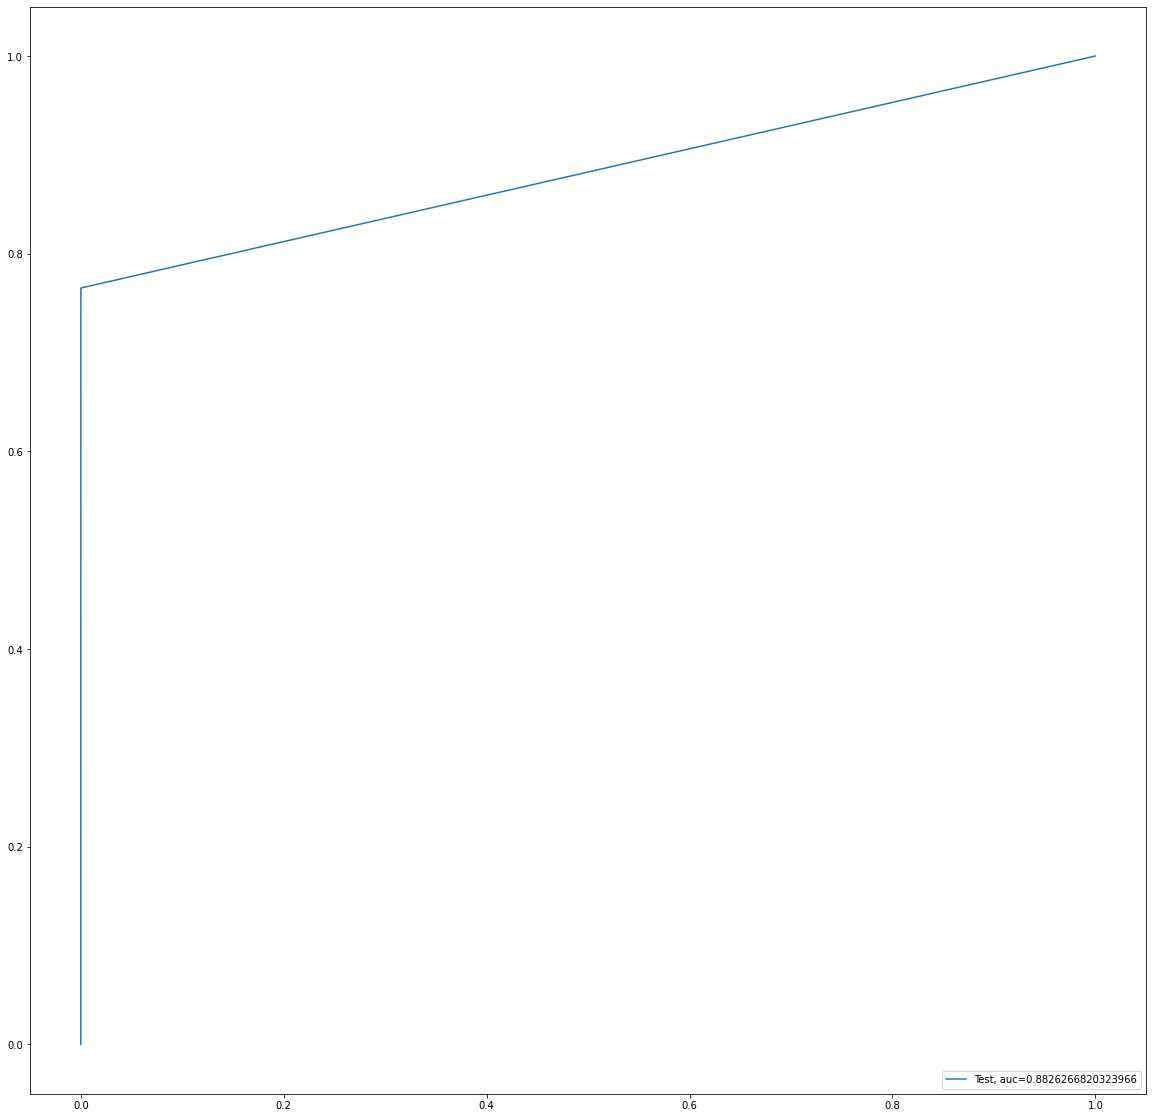

In [ ]:
# ROC on test
roc_value = roc_auc_score(y_test, y_predicted)
print("Random Forest: {0}" .format(roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Random Forest: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

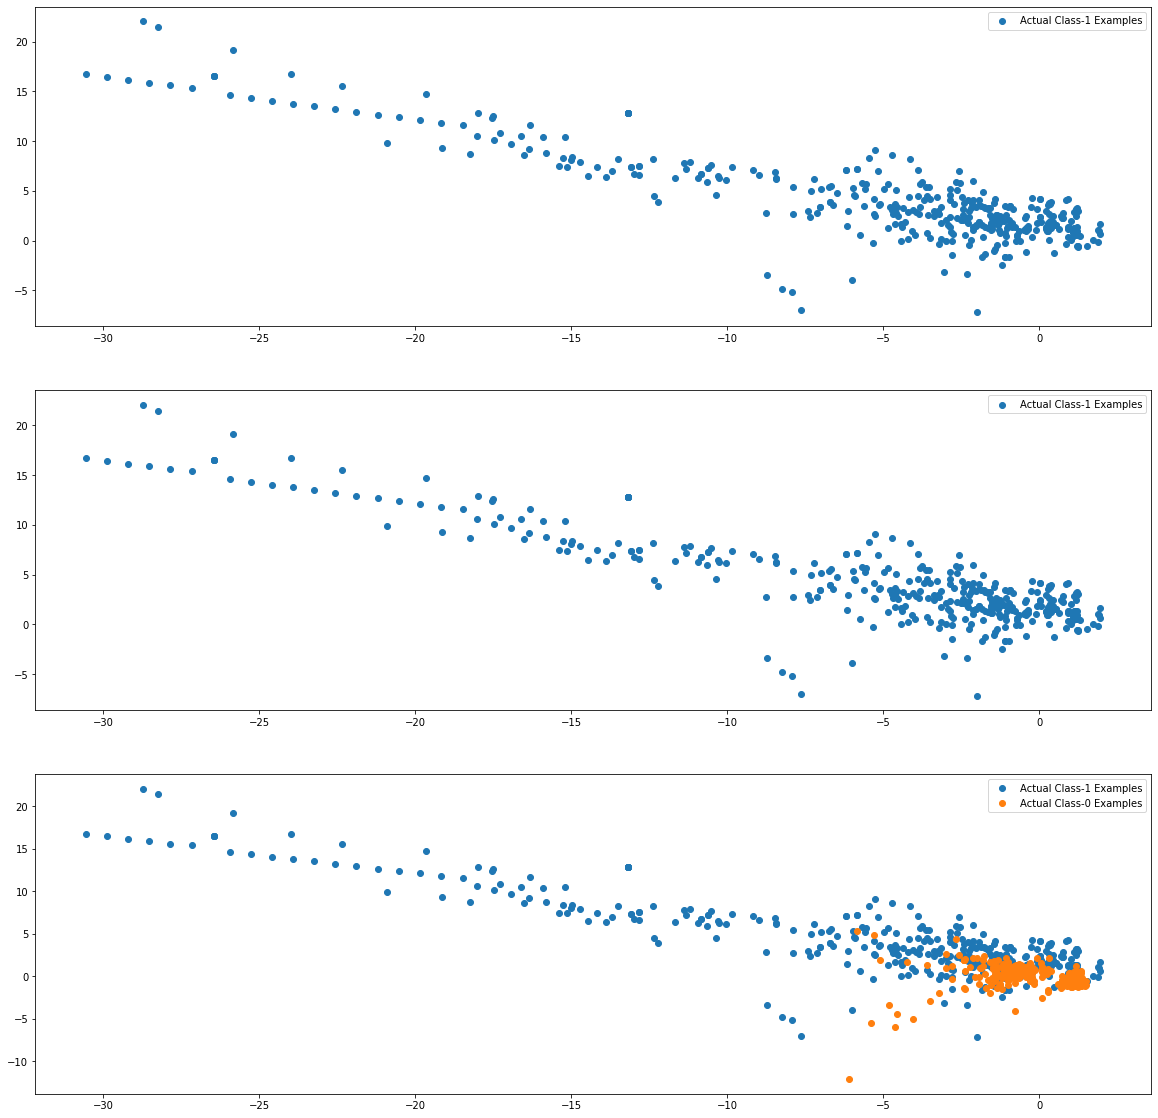

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
#plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1], label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling
from imblearn.over_sampling import ADASYN

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ADASYN().fit_resample(X_train,y_train)
  
#Create Dataframe for X_over
X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,   columns=cols)

In [ ]:
# Logistic Regression

Logistic Regression with L1 And L2 Regularisation
Maxim AUC & ROC for l2: 0.9812216731081793
Maxim AUC & ROC for l1: 0.5
Params of l2 regularisaationss
[[ 1.03489505  1.05683926  0.81540695  0.96251003  0.90526028 -0.91845618
  -1.0184122  -0.54695887 -0.41345031 -1.03707437  0.8526366  -1.46191811
  -0.18310512 -1.98992805  0.12415194 -0.96833713 -1.2463033  -0.61728201
   0.36338684 -1.46251341 -0.19623975  0.763035    0.67217863 -0.99500102
   0.76399011  0.24777816  0.03727025  1.35907901  0.01305607]]
[-4.69199127]
{1: array([[0.62624357, 0.64436533, 0.71907481, 0.86239421, 0.954175  ,
        0.97155484, 0.97596227, 0.97913808, 0.98040204, 0.98078372,
        0.98086518, 0.98086518, 0.98086518, 0.98086518, 0.98086518,
        0.98086518, 0.98086518, 0.98086518, 0.98086518, 0.98086518],
       [0.62645316, 0.64494511, 0.72032663, 0.86328022, 0.95435155,
        0.97156587, 0.97601286, 0.97927017, 0.98054737, 0.98094419,
        0.98099981, 0.98099981, 0.98099981, 0.98099981, 0.980

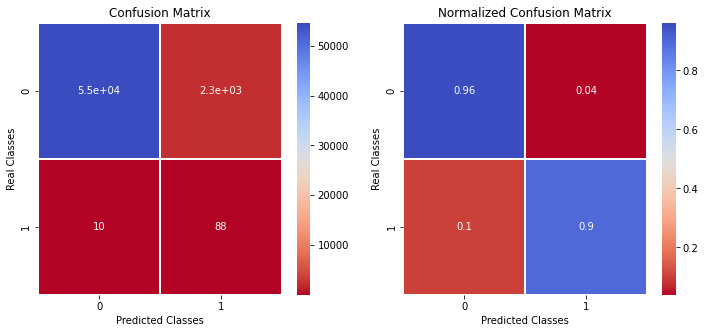

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56863
           1       0.04      0.90      0.07        98

    accuracy                           0.96     56961
   macro avg       0.52      0.93      0.53     56961
weighted avg       1.00      0.96      0.98     56961

classification_Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56863
           1       0.04      0.90      0.07        98

    accuracy                           0.96     56961
   macro avg       0.52      0.93      0.53     56961
weighted avg       1.00      0.96      0.98     56961

Accuarcies for Logistic Regression Models l1 regularisaationss : 0.9982795245869981
Confusionn_Matrices


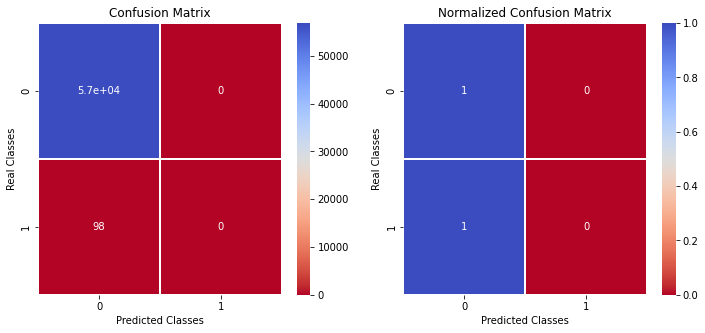

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2_rocValue: 0.9753464018602536
l2_threshold: 0.6326053720915775
ROC_test_Data 97.5%


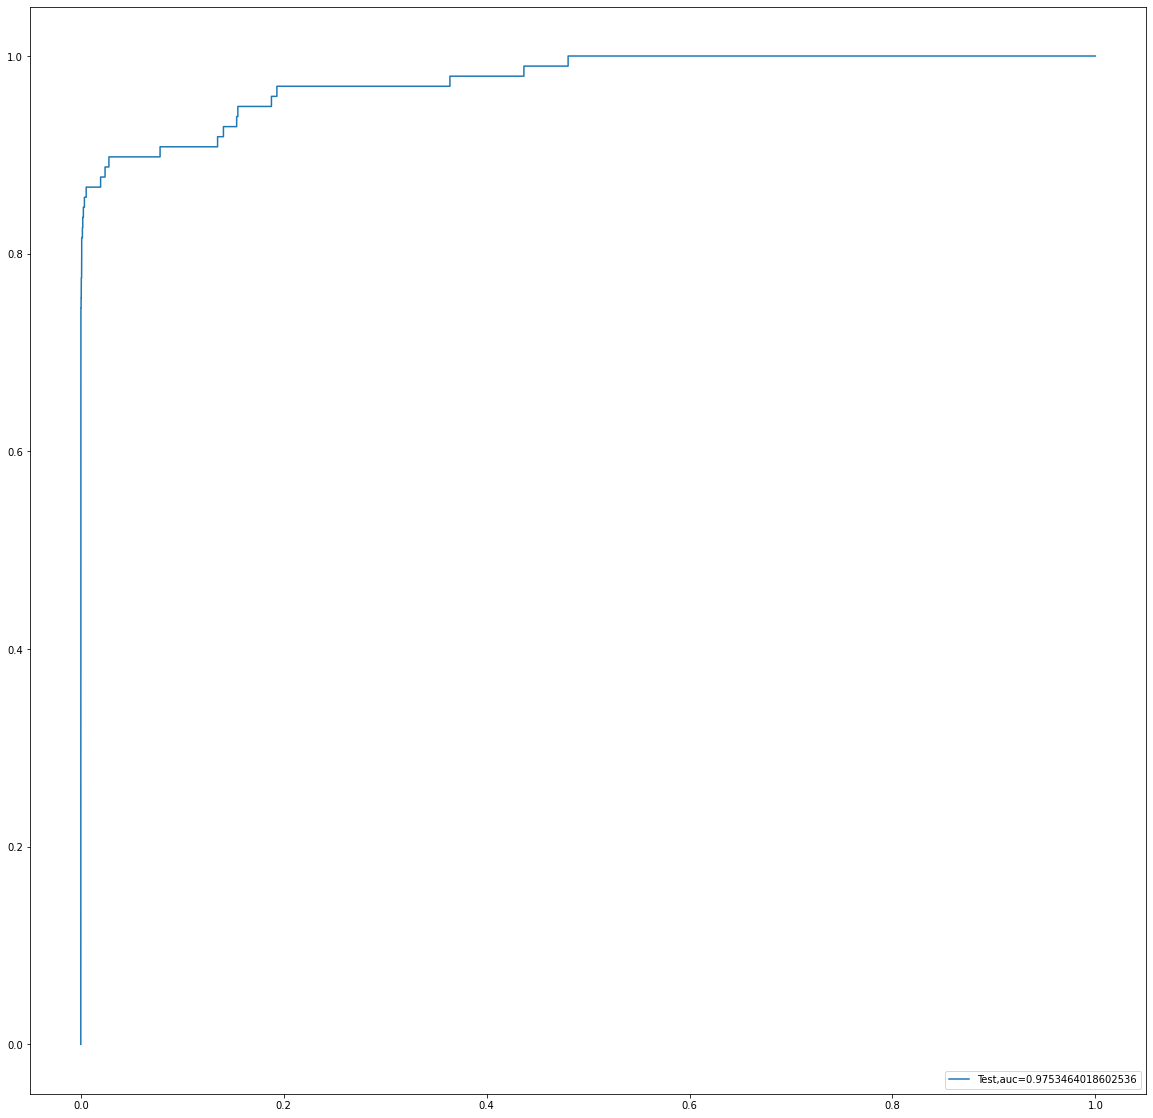

l1_rocValues: 0.5
l1_threshold: 1.5
ROC_test_dataset 50.0%


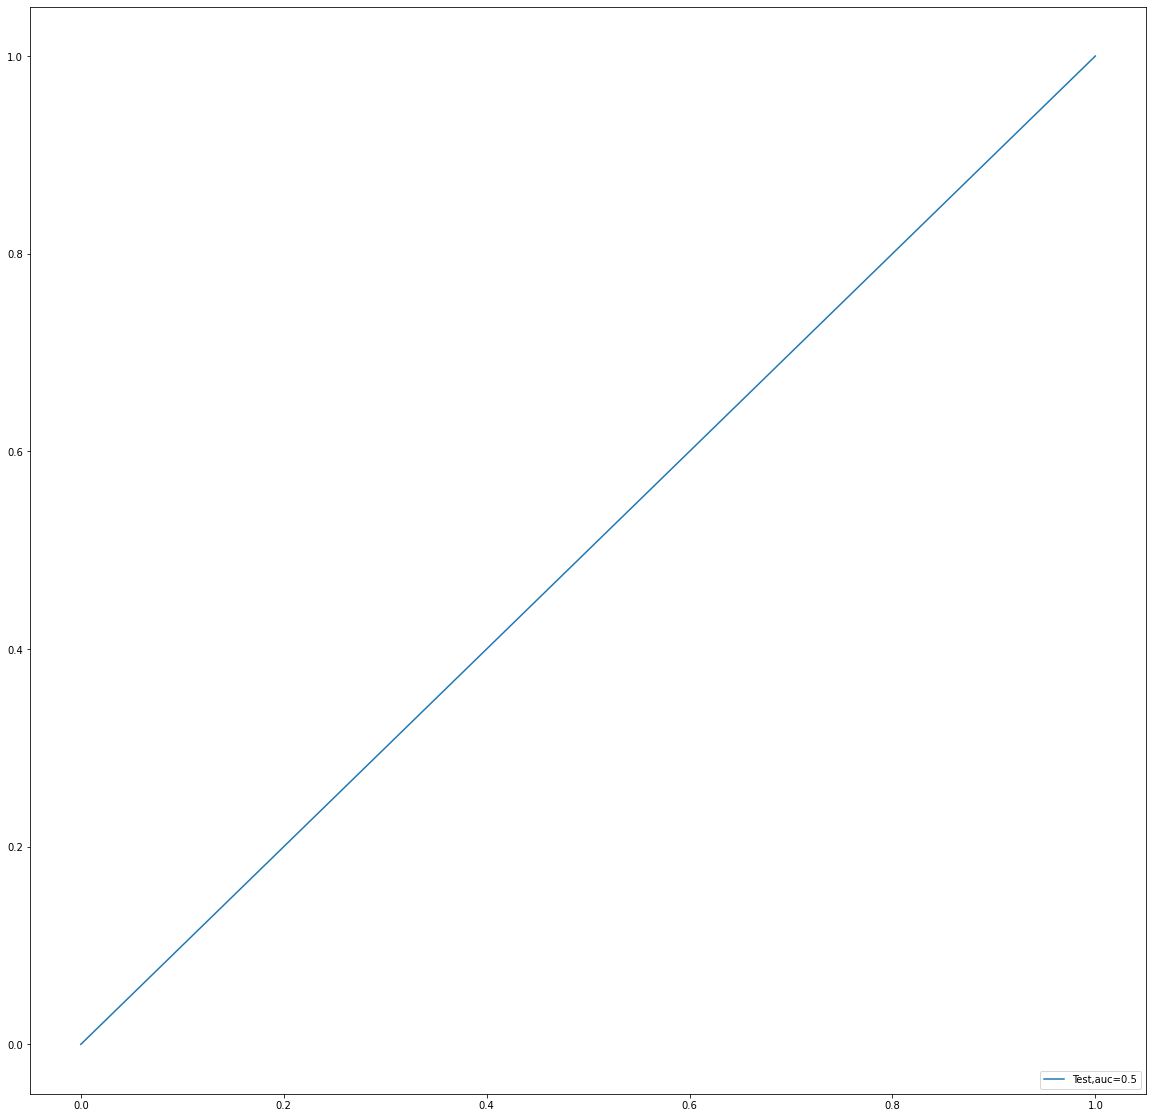

Time Taken by Model: --- 622.4599888324738 seconds ---
--------------------------------------------------------------------------------


In [ ]:
Data_Imbalance_Handiling = "ADASYN  Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
Data_Results = build_Run_Logistic_model(Data_Results, Data_Imbalance_Handiling, X_train_adasyn, y_train_adasyn , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [ ]:
#KNN

KNN Model
model score
0.9958392584399852
Confusion Matrix


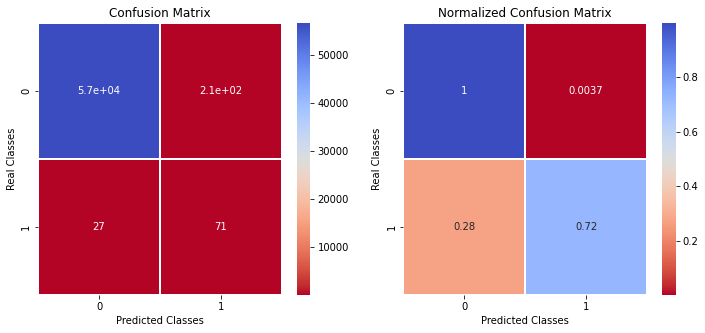

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.25      0.72      0.37        98

    accuracy                           1.00     56961
   macro avg       0.63      0.86      0.69     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8711282254843093
KNN threshold: 0.2
ROC for the test dataset 87.1%


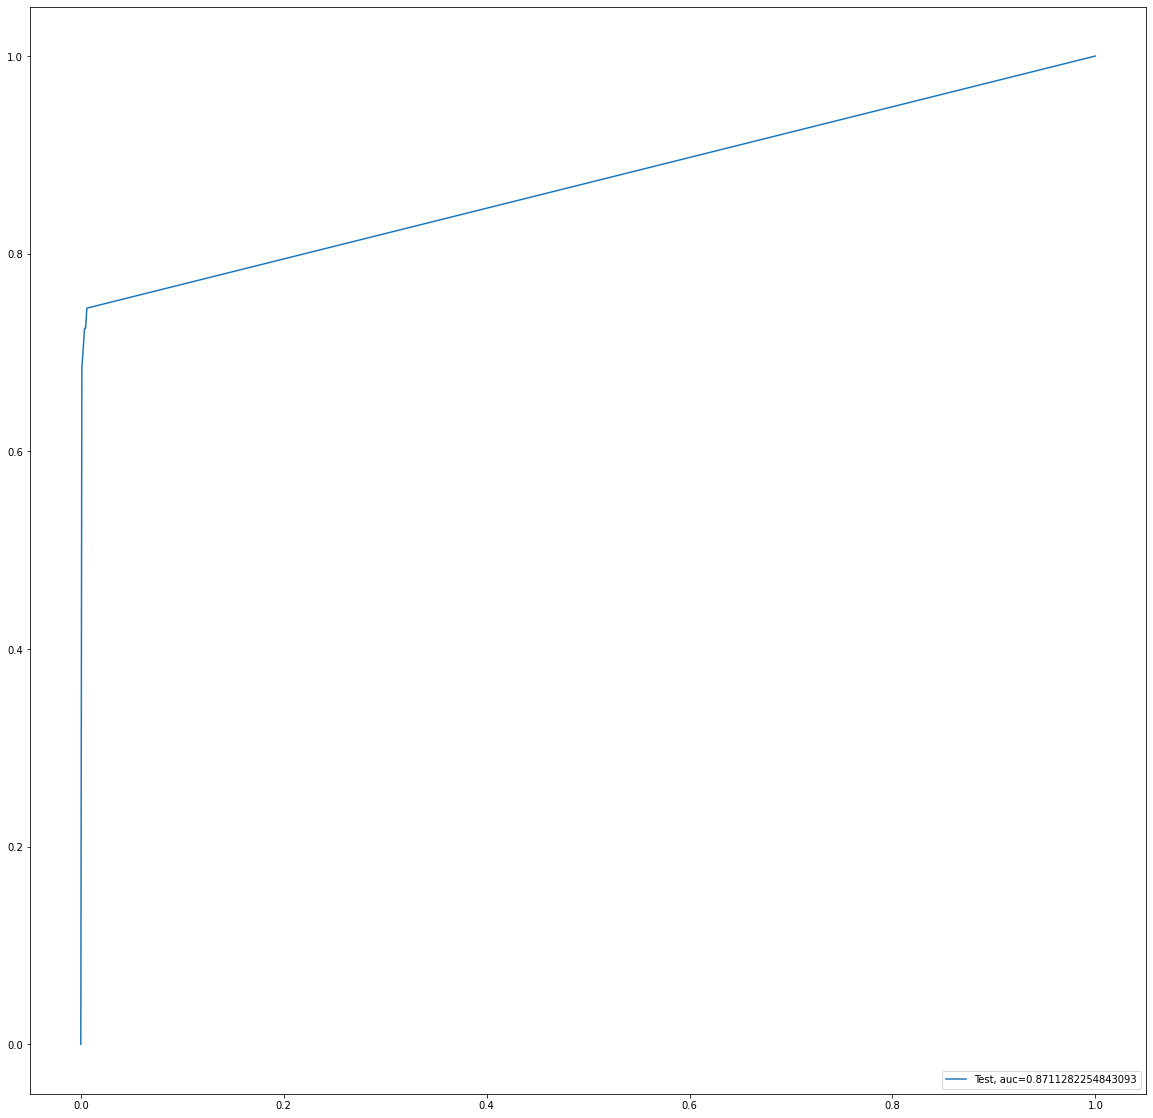

Time Taken by Model: --- 2921.599091053009 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run KNN Model
print("KNN Model")
start_time = time.time()
Data_Results = build_Run_KNN_model(Data_Results, Data_Imbalance_Handiling, X_train_adasyn, y_train_adasyn , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [ ]:
# Decision Tree

In [ ]:
# Decision Tree fitting
dt_bal_rus_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

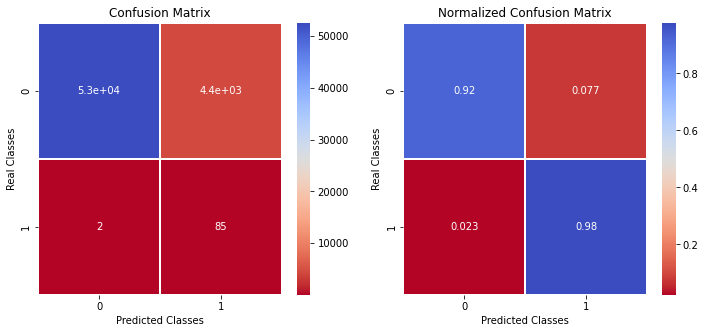

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56874
           1       0.02      0.98      0.04        87

    accuracy                           0.92     56961
   macro avg       0.51      0.95      0.50     56961
weighted avg       1.00      0.92      0.96     56961



In [ ]:
# Predictions on the test set
y_test_pred = dt_bal_rus_model.predict(X_test_CV)

plot_confusion_matrix(y_test_CV, y_test_pred)

In [ ]:
y_train_pred = dt_bal_rus_model.predict(X_train_adasyn)

Decision Tree: 0.950254525126929
Decision Tree: 1
ROC for the test dataset 95.0%


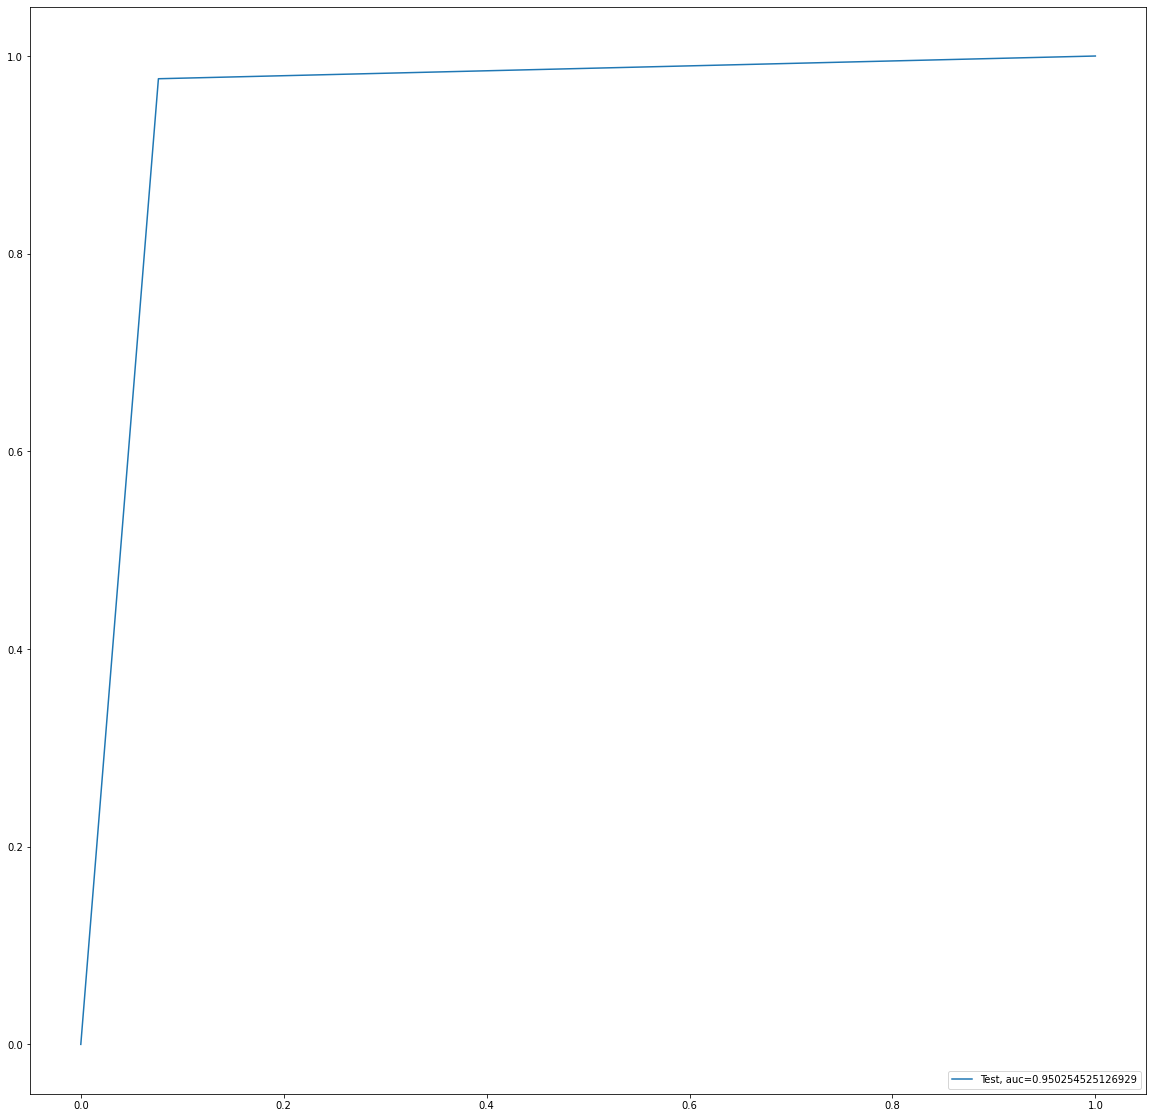

In [ ]:
# ROC on test
roc_value = roc_auc_score(y_test_CV, y_test_pred)
print("Decision Tree: {0}" .format(roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test_CV, y_test_pred)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Decision Tree: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

XGBoost Model
Model Accuracy: 0.9857621881638314
Confusion Matrix


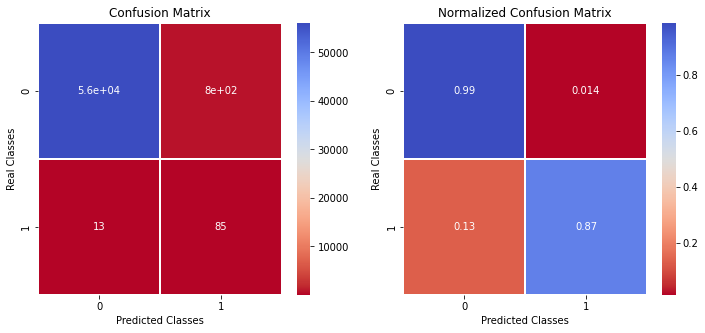

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.10      0.87      0.17        98

    accuracy                           0.99     56961
   macro avg       0.55      0.93      0.58     56961
weighted avg       1.00      0.99      0.99     56961

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.10      0.87      0.17        98

    accuracy                           0.99     56961
   macro avg       0.55      0.93      0.58     56961
weighted avg       1.00      0.99      0.99     56961

XGboost roc_value: 0.9780643558972927
XGBoost threshold: 0.3220278024673462
ROC for the test dataset 97.8%


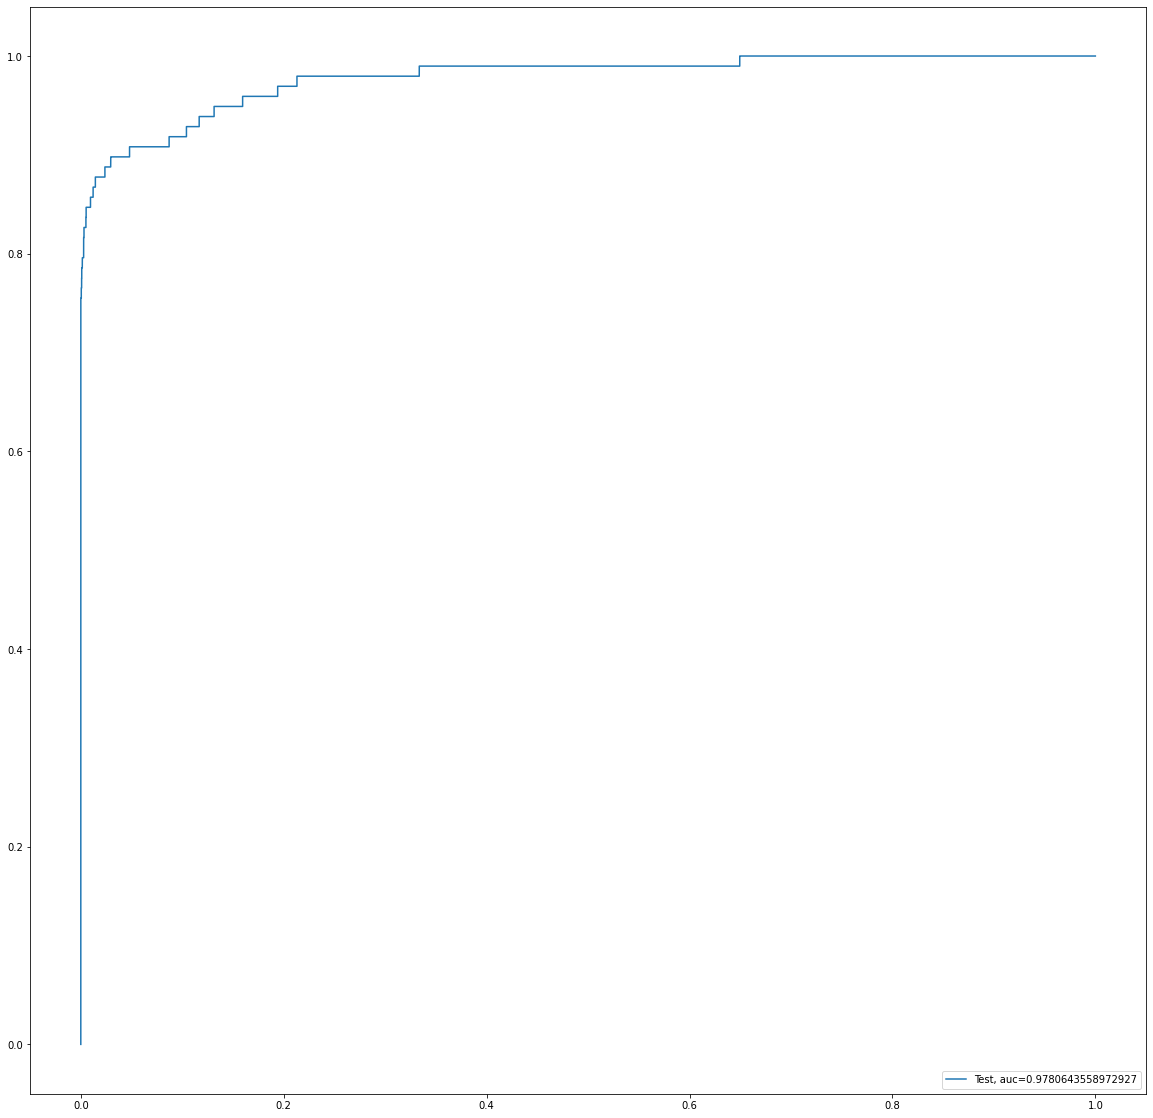

Time Taken by Model: --- 121.34990978240967 seconds ---
--------------------------------------------------------------------------------


In [ ]:
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
Data_Results = build_Run_XGBoost_model(Data_Results, Data_Imbalance_Handiling, X_train_adasyn, y_train_adasyn , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [ ]:
# Random Forest

In [ ]:
#Run Random Forest Model
# Fitting the model on Train data and Predicting on Test data

model_rfc.fit(X_train_adasyn,y_train_adasyn)
y_predicted = model_rfc.predict(X_test)

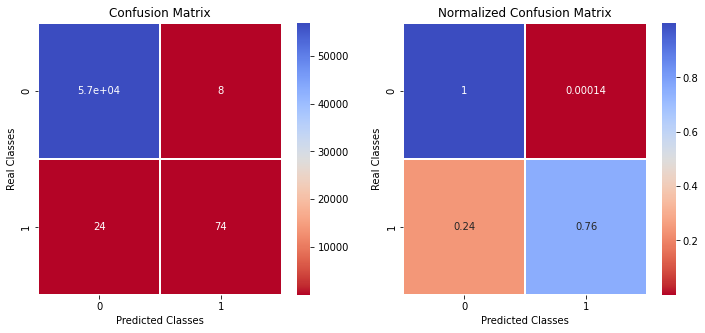

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.90      0.76      0.82        98

    accuracy                           1.00     56961
   macro avg       0.95      0.88      0.91     56961
weighted avg       1.00      1.00      1.00     56961



In [ ]:
# Predictions on the test set

plot_confusion_matrix(y_test, y_predicted)

Random Forest: 0.8774806758959145
Random Forest: 1
ROC for the test dataset 87.7%


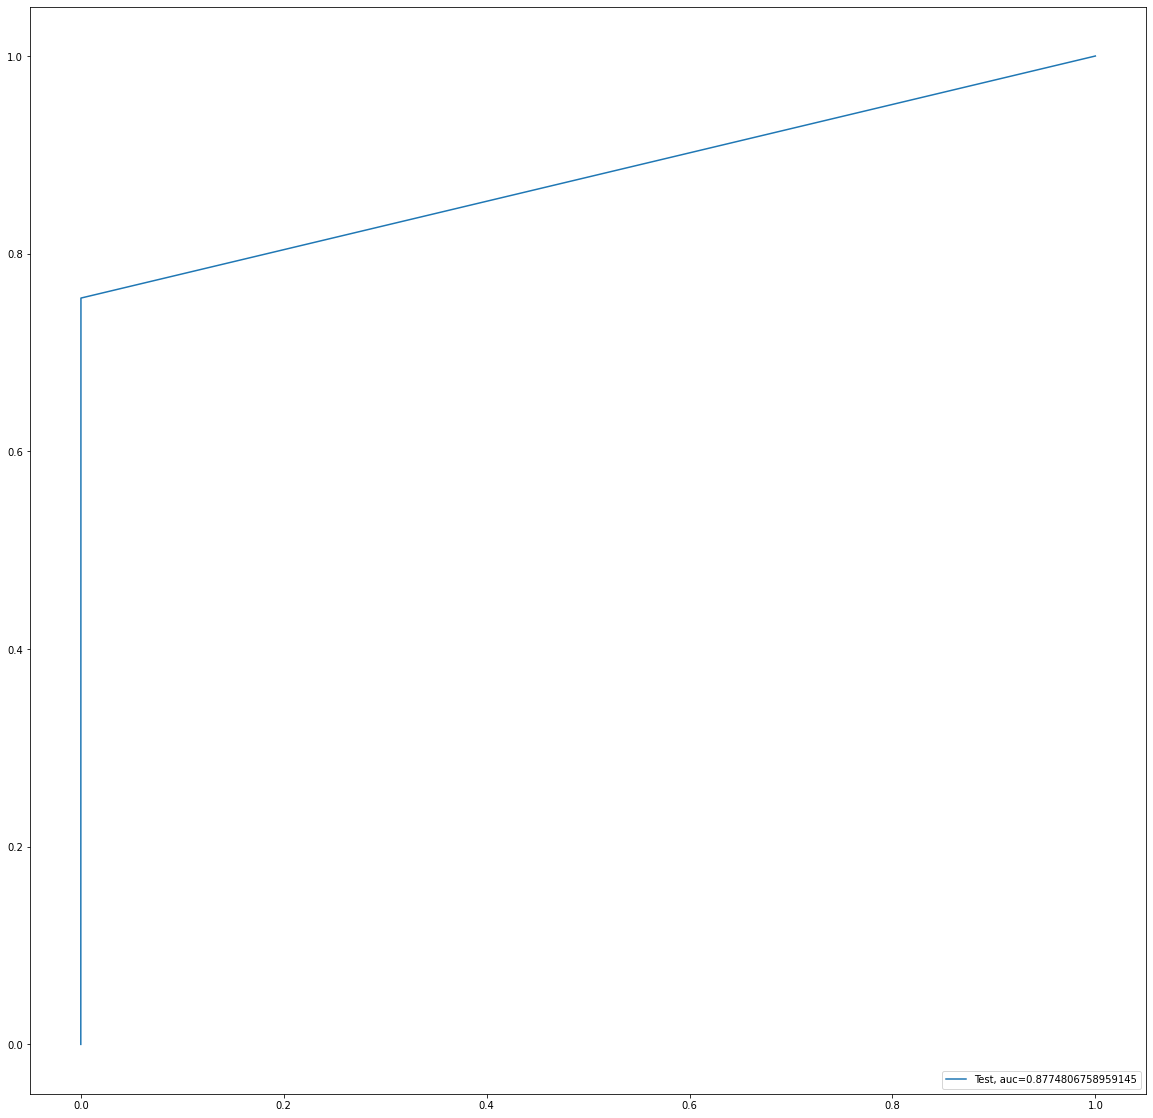

In [ ]:
# ROC on test
roc_value = roc_auc_score(y_test, y_predicted)
print("Random Forest: {0}" .format(roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Random Forest: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

##### Build models on other algorithms to see the better performing on ADASYN

In [ ]:
# By looking at above all models we conclude on the basis of ROC and other parameters like accuracy XGBoost model working better so we will proceed with that

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model on training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9947507944031881
XGboost roc_value: 0.9964142243781778
XGBoost threshold: 0.24532434344291687


In [ ]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model on training data
XGBmodel = XGBClassifier(random_state=42)

In [ ]:
#Lets tune XGBoost Model for max_depth and min_child_weight

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree',iid=False, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
              param_grid = param_test, scoring='roc_auc',n_jobs=4,cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([257.42828698, 253.81845617, 256.55992956, 423.67875299,
         410.85985346, 404.16954913, 601.80466948, 598.69548244,
         616.8633532 , 759.05996666, 688.58569355, 624.52535133]),
  'std_fit_time': array([ 2.67839275,  5.32310153,  1.04117023,  5.11750946,  3.54786681,
          5.62872662,  8.69065563,  7.43293001,  5.43235243, 23.56137757,
          5.19321988, 94.98433283]),
  'mean_score_time': array([1.01461859, 0.90636048, 0.95648599, 1.33347168, 1.31054015,
         1.35247831, 1.60320058, 1.52507319, 1.71272097, 1.71796079,
         1.9776052 , 1.14404874]),
  'std_score_time': array([0.05121569, 0.04698973, 0.06118183, 0.0798563 , 0.04614621,
         0.04399299, 0.01716286, 0.10381126, 0.25682043, 0.0812014 ,
         0.61406856, 0.39319841]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False]

In [ ]:
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'n_estimators':range(60,150,20)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree',iid=False, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([450.13931093, 558.53589535, 706.38346925, 850.57905545,
         901.15274591]),
  'std_fit_time': array([ 10.16337062,  16.85546981,  26.89736614,  12.82924142,
         208.12959699]),
  'mean_score_time': array([1.05638666, 1.32318516, 1.71606421, 2.07501316, 1.85711102]),
  'std_score_time': array([0.0397612 , 0.0670599 , 0.04604944, 0.04733599, 0.71295592]),
  'param_n_estimators': masked_array(data=[60, 80, 100, 120, 140],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 60},
   {'n_estimators': 80},
   {'n_estimators': 100},
   {'n_estimators': 120},
   {'n_estimators': 140}],
  'split0_test_score': array([0.99999296, 1.        , 1.        , 1.        , 1.        ]),
  'split1_test_score': array([0.99994455, 0.99996927, 0.99997032, 0.99997247, 0.99997396]),
  'split2_test_score': array([0.9999821 , 0.999982  , 0.9999887 , 0.9999933 , 0.99999403]),
  'split3_test_

In [11]:
# We will narror down the tunned parameters of max_depth ,  min_child_weight and n_estimators
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'n_estimators':[110,120,130],
  'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree',iid=False, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=140, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

GridSearchCV(cv=5,
             estimator=XGBClassifier(iid=False, max_depth=9, n_estimators=140,
                                     random_state=42),
             n_jobs=4,
             param_grid={'max_depth': [2, 3, 4], 'min_child_weight': [4, 5, 6],
                         'n_estimators': [110, 120, 130]},
             scoring='roc_auc')

In [12]:
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([233.32842989, 236.30489531, 253.94269991, 222.35196939,
         238.20292101, 251.84657178, 218.89755607, 241.43193135,
         255.36071668, 315.28367476, 348.28800807, 372.47793779,
         309.52983418, 343.70743833, 382.48209949, 324.85271196,
         373.6465734 , 378.39144435, 447.08542895, 478.14216056,
         496.02796783, 410.87138739, 450.05697441, 483.23577895,
         394.83971529, 447.99656868, 435.29147415]),
  'std_fit_time': array([ 7.24039197,  3.39129993,  4.16175005,  1.26608961,  3.45114939,
          2.30029707,  3.89202774,  3.00632079,  3.72104256,  4.08620286,
          2.1989746 ,  2.00454752,  4.23863512,  8.74064521,  3.88258488,
          2.587593  , 17.63083418, 17.01940048, 18.34157794, 12.78394746,
         10.87695709,  4.71154278,  3.17222707,  7.86032115,  4.5997959 ,
          3.27625605, 75.008375  ]),
  'mean_score_time': array([0.79348707, 1.05899215, 0.93038859, 0.81827788, 0.86560397,
         1.03354168, 0.930151

In [13]:
#With 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 130 parameters tuned above we will now check learning rate

# We will narror down the tunned parameters of max_depth ,  min_child_weight and n_estimators
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'learning_rate':[0.05,0.1,0.125,0.15,0.2]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree',iid=False, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([513.57847462, 493.6909524 , 487.31725039, 625.37753239,
         578.33682327]),
  'std_fit_time': array([ 12.72272619,   8.41309172,   7.38614147,  63.60745932,
         191.1940582 ]),
  'mean_score_time': array([1.42007341, 1.49272799, 1.50781212, 1.65847783, 1.26421814]),
  'std_score_time': array([0.07000113, 0.06057959, 0.08914845, 0.07277652, 0.36682737]),
  'param_learning_rate': masked_array(data=[0.05, 0.1, 0.125, 0.15, 0.2],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'learning_rate': 0.05},
   {'learning_rate': 0.1},
   {'learning_rate': 0.125},
   {'learning_rate': 0.15},
   {'learning_rate': 0.2}],
  'split0_test_score': array([0.99980861, 0.99994949, 0.99997066, 0.9999864 , 0.99999713]),
  'split1_test_score': array([0.99978882, 0.99993788, 0.99993825, 0.99996536, 0.99998306]),
  'split2_test_score': array([0.99985568, 0.99996298, 0.99997557, 0.99998228, 0.99999508]

In [14]:
#With 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 130 parameters tuned above we will now check learning rate

# We will narror down the tunned parameters of max_depth ,  min_child_weight and n_estimators
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
'gamma':[i/10.0 for i in range(0,5)]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', iid=False,colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([601.57726722, 509.22010427, 501.90851564, 502.48843164,
         433.48091679]),
  'std_fit_time': array([ 49.45524606,   5.8157012 ,   5.61808972,   2.48911849,
         143.63760934]),
  'mean_score_time': array([1.69010096, 1.62362423, 1.52737021, 1.7707571 , 1.20250273]),
  'std_score_time': array([0.02548695, 0.07253135, 0.07352769, 0.36647047, 0.45908402]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.99999713, 0.99999933, 0.99999989, 0.99999717, 0.99999743]),
  'split1_test_score': array([0.99998306, 0.99998287, 0.99998374, 0.9999842 , 0.99998109]),
  'split2_test_score': array([0.99999508, 0.99999422, 0.9999921 , 0.99999165, 0.99999227]),
  'split3_test_score': array([0.99999856, 0.99999947,

In [16]:
#Evaluate XGboost model
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9991397773954567
XGboost roc_value: 0.965855402759704
XGBoost threshold: 0.001578540075570345


In [17]:
# perform the best oversampling method on X_train & y_train

clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
clf.fit(X_over, y_over ) # fit on the balanced dataset
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9991397773954567
XGboost roc_value: 0.965855402759704
XGBoost threshold: 0.001578540075570345


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 12


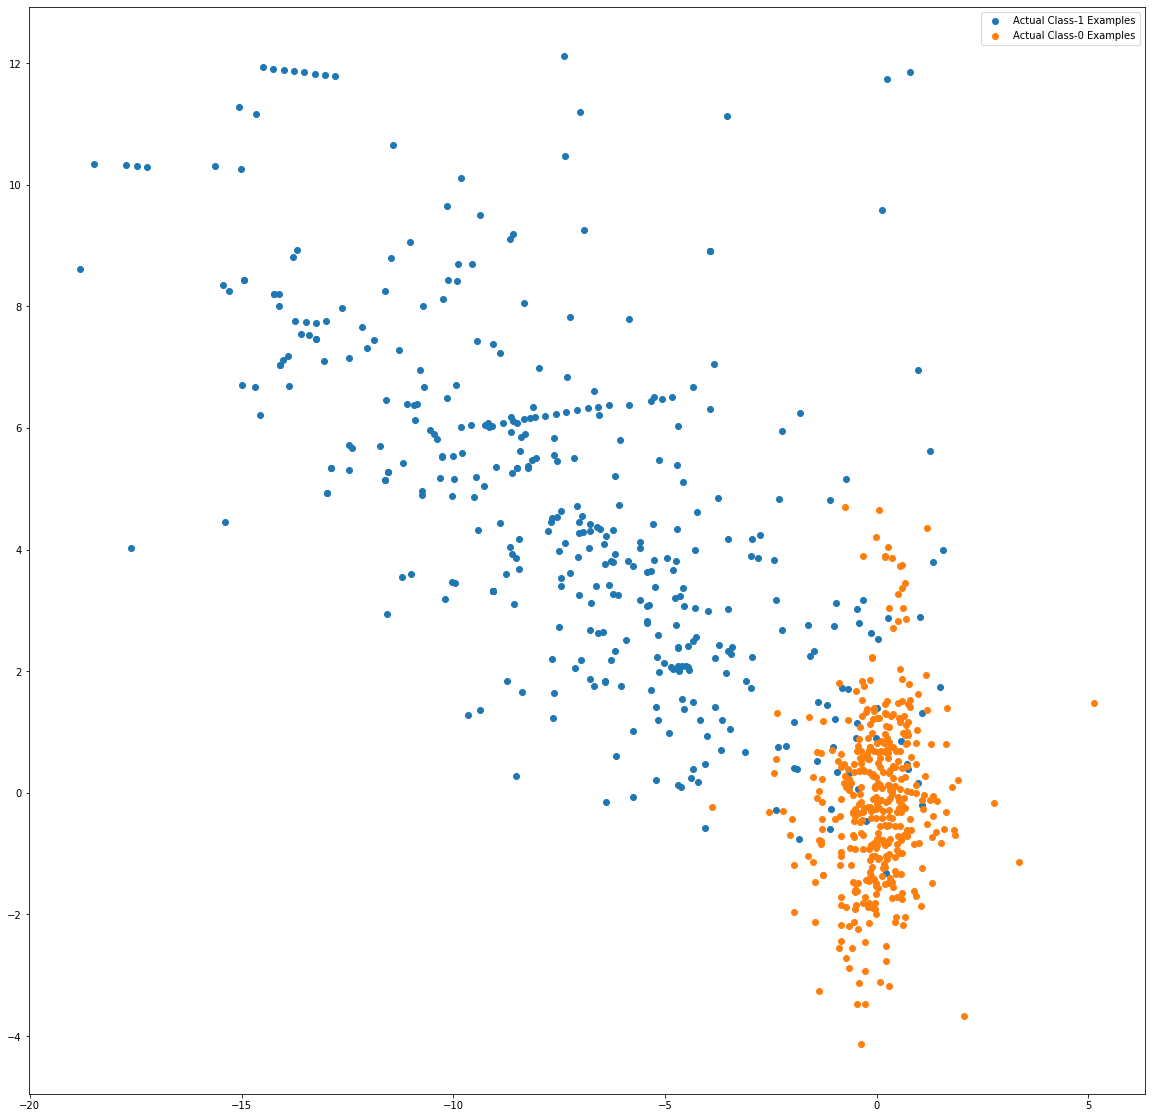

In [18]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [20]:
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGboost roc_value: 0.965855402759704
XGBoost threshold: 0.001578540075570345


## Here we have concluded that XGBoost model with random oversampling and without any hyperparameter tuning woking very good having 99% Accuracy And 99% AUC ROC curve